## Select one-hour krypton + argon run 181025_0030
* To study peak classification

In [2]:
import strax
import straxen
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [3]:
from matplotlib.lines import Line2D

In [4]:
straxen.__version__

'0.14.1'

In [4]:
def L1_norm_c(data):
    #first 0 out all negative values
    data = np.where(data<0, 0, data)
    #now L1 normalize
    peaks_L1 = np.zeros((np.shape(data)))
    for aa in np.arange(len(data[:,1])):
        peaks_L1[aa,:] = data[aa,:]/np.sum(data[aa,:])     
    #sanity check
    if np.min(peaks_L1) != 0:
        print("error has occured, data minimum is NOT 0")
        
    return peaks_L1

In [5]:
def plot2(true,predicted):
    import pandas as pd
    columns=['S2','S1']
    indecies = ['S2', 'S1']
    table = pd.DataFrame(confusion_matrix(true, predicted)/np.sum(confusion_matrix(true, predicted),axis = 0),
                         columns = columns, index = indecies)
    sns.heatmap(table, annot = True, fmt = 'f', cmap = 'viridis')
    plt.ylabel('Ground Truth')
    plt.xlabel('Prediction')
    plt.show()

In [6]:
def generate_confusion_mat(predicted,truth,num_cls):
    import pandas as pd
    import seaborn as sn
    import matplotlib.pyplot as plt

    data = {'y_Actual':    truth,
            'y_Predicted': predicted
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    #df = pd.DataFrame(data, columns=['y_Predicted','y_Actual'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Ground truth'], colnames=['Predicted'], margins = True)
    #confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames=['Ground truth'], colnames=['Predicted'], margins = True)
    a = confusion_matrix
    aa = np.array(a)
    v = aa[:,num_cls]
    confusion_matrix = confusion_matrix / v[:,None]

    sn.heatmap(confusion_matrix, annot=True)
    #plt.savefig('Qual_imgs/kr83_confusion_mat_SOM.png')
    plt.show()

In [7]:
def upsample_data(wfdata, max_dt):
    '''this function takes in waveforms of different dts and upsamples them by repeating
    the elements by the dt value and padding with zeros when necessary
    Max dt is just the largest dt to use'''
    wfdata = wfdata[wfdata['dt']<=max_dt]
    data = wfdata['data'].copy()
    dt = wfdata['dt'].copy() // 10 # Integer divide by 10 ns
    #max_dt = 8 # units of 10 ns
    assert dt.max() <= max_dt

    # This will be where the padded waveforms go
    S2_padded_data = np.zeros((data.shape[0],
                            data.shape[1]*max_dt))

    for value in np.unique(dt): 
        # Just pick waveforms with dt of some value, where this is the mask
        selection = dt == value

    # Fill required values in the padded data
        S2_padded_data[selection, 0:value*200] = np.repeat(data[selection],
                                                        value,
                                                        axis=1,)
    return S2_padded_data

In [8]:
def assign_labels(data, ref_img, xdim, ydim, cut_out):
    '''This functions takes in the data and classifications based on an image gives the
    unique labels as well as the data set bacl with the new classification
    PS this version only takes in S1s and S2s and ignores unclassified samples, 
    another version will be made to deal with the unclassified samples
    
    data: can be either peaks or peak_basics
    ref_img: will be the image extracted from the SOM classification of each data point
    xdim: width of the image cube
    ydim: height of the image cube
    cut_out: removes the n last digits of the image vector if necesarry'''
    from PIL import Image
    img = Image.open(ref_img)
    imgGray = img.convert('L')
    #imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')
    img_color = np.array(img)
    img_color_2d = img_color.reshape((xdim*ydim,3))
    label = -1 * np.ones(img_color.shape[:-1])
    colorp = np.unique(img_color_2d, axis = 0)
    for i, color in enumerate(colorp):  # argwhere
        label[np.all((img_color == color), axis = 2)] = i
    label_vec = label.reshape((xdim*ydim))
    if cut_out != 0:
        label_vec_nonzero = label_vec[:-cut_out]
    elif cut_out == 0:
        label_vec_nonzero = label_vec
    s2_data = data[data['type'] == 2]
    s1_data = data[data['type'] == 1]
    som_class_peaks = np.concatenate((s2_data,s1_data)) #note had to reverse s2,s1 to s1,s2
    som_class_peaks['type'] = label_vec_nonzero
    
    return colorp, som_class_peaks

In [9]:
st = straxen.contexts.xenon1t_dali()

In [6]:
peaks = st.get_array('181025_0030','peak_basics') #load data when we had direct access to it

In [14]:
bb = np.load('peaks_181025_0030.npz')

In [19]:
import pickle #import data back
#with open('peak_basics_181025_0030.pickle', 'rb') as handle:
#    peak_b = pickle.load(handle)

with open('peaks_181025_0030.pickle', 'rb') as handle:
    peak_r = pickle.load(handle)

EOFError: Ran out of input

In [ ]:
### Testing fucntions will delete later ###

In [134]:
peak_r.dtype

dtype([(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Length of the interval in samples', 'length'), '<i4'), (('Width of one sample [ns]', 'dt'), '<i2'), (('Channel/PMT number', 'channel'), '<i2'), (('Classification of the peak(let)', 'type'), 'i1'), (('Integral across channels [PE]', 'area'), '<f4'), (('Integral per channel [PE]', 'area_per_channel'), '<f4', (248,)), (('Number of hits contributing at least one sample to the peak ', 'n_hits'), '<i4'), (('Waveform data in PE/sample (not PE/ns!)', 'data'), '<f4', (200,)), (('Peak widths in range of central area fraction [ns]', 'width'), '<f4', (11,)), (('Peak widths: time between nth and 5th area decile [ns]', 'area_decile_from_midpoint'), '<f4', (11,)), (('Does the channel reach ADC saturation?', 'saturated_channel'), 'i1', (248,)), (('Total number of saturated channels', 'n_saturated_channels'), '<i2'), (('Hits within tight range of mean', 'tight_coincidence'), '<i2'), (('Largest gap between hits inside peak [ns]', 'max_gap'

Here we convert the data into the area decile data

In [155]:
desired_widths = np.linspace(0, 1, len(peak_r[100]['width']))#creates a line form 0 to 1 in intervals of 0.1
desired_fr = np.concatenate([0.5 - desired_widths / 2,
                                 0.5 + desired_widths / 2]) #create intercals from midpoint out increasing in 0.5 intervals
desired_fr

array([0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ,
       0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [156]:
desired_fr = np.sort(np.unique(np.append(desired_fr, [0.5]))) #very convoluted way of increasing in intervals of 0.5
desired_fr

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [12]:
def index_of_fraction(peaks, fractions_desired):
    """Return the (fractional) indices at which the peaks reach
    fractions_desired of their area
    :param peaks: strax peak(let)s or other data-bearing dtype
    :param fractions_desired: array of floats between 0 and 1
    :returns: (len(peaks), len(fractions_desired)) array of floats
    """
    results = np.zeros((len(peaks), len(fractions_desired)), dtype=np.float32)

    for p_i, p in enumerate(peaks):
        if p['area'] <= 0:
            continue  # TODO: These occur a lot. Investigate!
        compute_index_of_fraction(p, fractions_desired, results[p_i])
    return results

In [13]:
def compute_index_of_fraction(peak, fractions_desired, result):
    """Store the (fractional) indices at which peak reaches
    fractions_desired of their area in result
    :param peak: single strax peak(let) or other data-bearing dtype
    :param fractions_desired: array of floats between 0 and 1
    :returns: len(fractions_desired) array of floats
    """
    area_tot = peak['area']
    fraction_seen = 0
    current_fraction_index = 0
    needed_fraction = fractions_desired[current_fraction_index]
    for i, x in enumerate(peak['data'][:peak['length']]):
        # How much of the area is in this sample?
        fraction_this_sample = x / area_tot

        # Are we passing any desired fractions in this sample?
        while fraction_seen + fraction_this_sample >= needed_fraction:

            area_needed = area_tot * (needed_fraction - fraction_seen)
            if x != 0:
                result[current_fraction_index] = i + area_needed / x
            else:
                result[current_fraction_index] = i

            # Advance to the next fraction
            current_fraction_index += 1
            if current_fraction_index > len(fractions_desired) - 1:
                break
            needed_fraction = fractions_desired[current_fraction_index]

        if current_fraction_index > len(fractions_desired) - 1:
            break

        # Add this sample's area to the area seen
        fraction_seen += fraction_this_sample

    if needed_fraction == 1:
        # Sometimes floating-point errors prevent the full area
        # from being reached before the waveform ends
        result[-1] = peak['length']


In [162]:
ten_percent = index_of_fraction(peak_r, desired_widths)
#fifty_percent = index_of_fraction(peak_r, 0.5)

Separate data into S1 and S2s according to the strax classifications and clean it up!

In [8]:
tr_peaks = st.get_array('181025_0030','peaks')

In [9]:
tr_peaks['type']

array([1, 2, 2, ..., 0, 2, 0], dtype=int8)

In [10]:
peaks['type']

array([1, 2, 2, ..., 0, 2, 0], dtype=int8)

In [297]:
s1 = peaks[peaks['type']==1]

In [298]:
s2 = peaks[peaks['type']==2]

In [13]:
s = peaks[peaks['type']==0]

In [14]:
s2_tr = tr_peaks[tr_peaks['type']==2]
s1_tr = tr_peaks[tr_peaks['type']==1]
s_tr = tr_peaks[tr_peaks['type']==0]

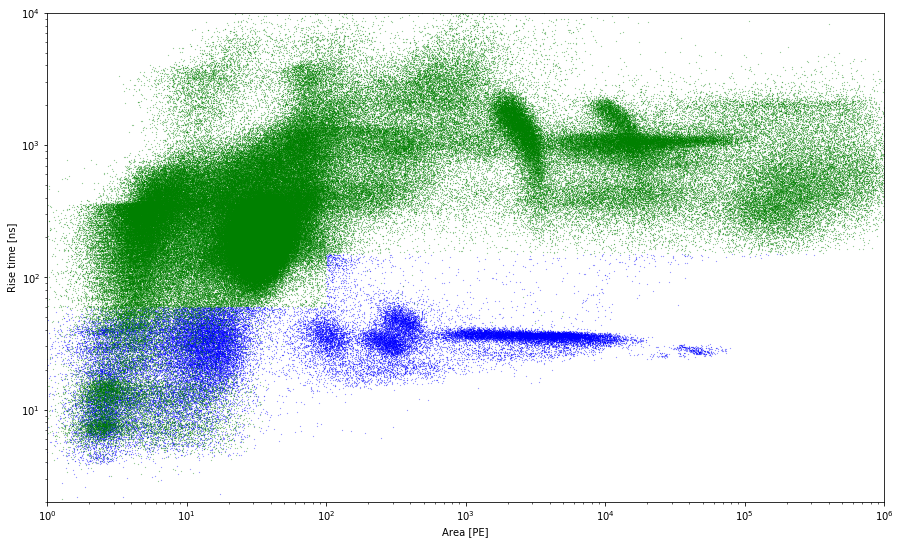

In [15]:
fig = plt.figure(figsize=(15,9))
plt.scatter(s1['area'],s1['rise_time'], s= 0.1, marker='.',color='b')
plt.scatter(s2['area'],s2['rise_time'], s= 0.1, marker='.',color='g')
#plt.scatter(s['area'],s['rise_time'], s= 0.1, marker='.',color='k')
plt.yscale('log')
plt.ylim(2,10000)
plt.xlim(1,1e6)
plt.xscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise time [ns]')
plt.show()

* Need to do some clean up to remove single electrons tails by requiring PeakProximity's n_competing_left == 0

In [16]:
peaks_pro = st.get_array('181025_0030','peak_proximity')

In [296]:
clean_peaks = peaks_pro[peaks_pro['n_competing_left']==0]

* Select only peaks that have 'n_competing_left'==0 as was discused in https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenonnt:analysis:strax_clustering_classification

In [18]:
save_s1=[]
for j in clean_peaks:
    index = np.where(s1['time']==j['time']) 
    if len(index[0]) != 0:
        save_s1.append(index[0][0])

In [19]:
save_s2=[]
for j in clean_peaks:
    index = np.where(s2['time']==j['time']) 
    if len(index[0]) != 0:
        save_s2.append(index[0][0])

In [20]:
save_s=[]
for j in clean_peaks:
    index = np.where(s['time']==j['time']) 
    if len(index[0]) != 0:
        save_s.append(index[0][0])

* Filtering peaks

In [373]:
s1=s1[save_s1]

In [374]:
s2=s2[save_s2]

In [23]:
s=s[save_s]

In [24]:
s2_tr = s2_tr[save_s2]
s1_tr = s1_tr[save_s1]

In [71]:
krRpb = np.concatenate((s2,s1))

In [56]:
krcc_peaks = np.concatenate((s1_tr,s2_tr))
np.shape(krcc_peaks)

(62357,)

In [26]:
def L1_norm(data):
    #first 0 out all negative values
    data['data'] = np.where(data['data']<0, 0, data['data'])
    #now L1 normalize
    peaks_L1 = np.zeros((np.shape(data['data'])))
    for aa in np.arange(len(data['data'][:,1])):
        peaks_L1[aa,:] = data['data'][aa,:]/np.sum(data['data'][aa,:])     
    #sanity check
    if np.min(peaks_L1) != 0:
        print("error has occured, data minimum is NOT 0")
        
    return peaks_L1

In [27]:
krcc_peak_L1 = L1_norm(krcc_peaks) #normalize data

In [28]:
krcc_peak_L1_0vec = np.concatenate((krcc_peak_L1,np.zeros((143,200))))

In [25]:
def export_data(data, export_name):
    data_vec = np.reshape(data, (len(data[1,:])*len(data[:,1])))
    
    import struct

    f=open(export_name,"wb")
    export_TL = data_vec
    export_TL.dtype
    myfmt='f'*len(export_TL)
    #  You can use 'd' for double and < or > to force endinness
    bin=struct.pack(myfmt,*export_TL)
    f.write(bin)
    f.close()
    #export name must be a string with the extnesion.raw

In [94]:
export_data(krcc_peak_L1_0vec, 'kr83_selection_cuts_L1.raw')

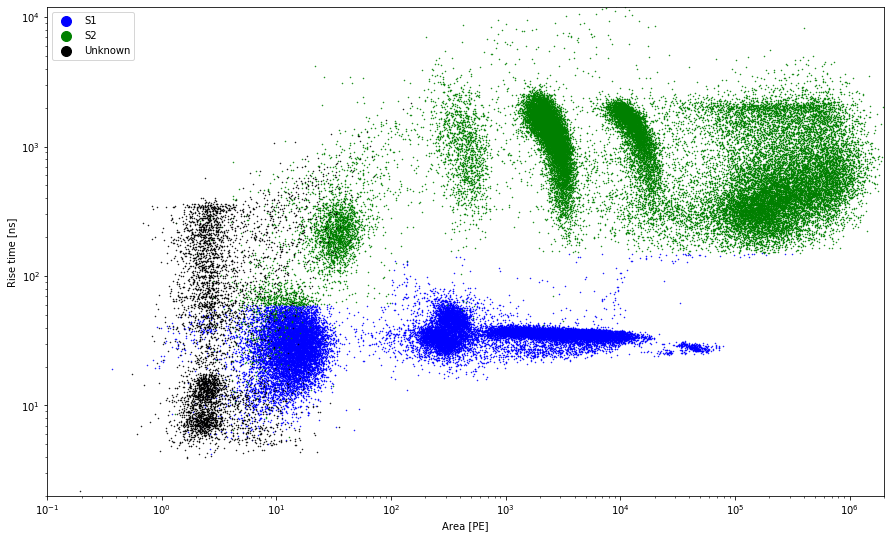

In [29]:
fig = plt.figure(figsize=(15,9)) #cleaned up data in the rise time vs area space
plt.scatter(s1['area'],s1['rise_time'], s= 1, marker='.',color='b',label='S1')
plt.scatter(s2['area'],s2['rise_time'], s= 1, marker='.',color='g',label='S2')
plt.scatter(s['area'],s['rise_time'], s= 1, marker='.',color='k',label='Unknown')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise time [ns]')
plt.legend(markerscale=20)
plt.show()

In [30]:
s1_dt = s1[s1['dt'] <= 80]
s2_dt = s2[s2['dt'] <= 80]

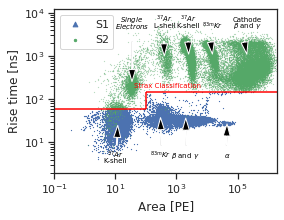

In [1138]:
#fig = plt.figure(figsize=(15,9))
#f = r"$Single \\$" + \ r"$Electrons$"
fz = 7
fig, ax = plt.subplots(figsize=(4,3))
plt.scatter(s1_dt['area'],s1_dt['rise_time'], s= .1, marker='^',color='b',label='S1')
plt.scatter(s2_dt['area'],s2_dt['rise_time'], s= .1, marker='.',color='g',label='S2')
#plt.scatter(s['area'],s['rise_time'], s= 1, marker='.',color='k',label='Unknown')

### S2 annotations ###
#single electrons
ax.annotate(' ',xy=(35, 250),  xycoords='data',
            xytext=(0.35, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(35, 7000, r"$Single$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(35, 5000, r"$Electrons$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Ar37 L shell
ax.annotate(' ',xy=(400, 1000),  xycoords='data',
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(400, 7000, r"$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(400, 5000, r"L-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Ar37 Kshell
ax.annotate(' ',xy=(2500, 1100),  xycoords='data',
            xytext=(0.6, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(2400, 7000, r"$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(2400, 5000, r"K-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Kr83
ax.annotate(' ',xy=(15000, 1100),  xycoords='data',
            xytext=(0.7, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(15000, 5000, r"$^{83m}Kr$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})

#Betas and gammas
ax.annotate(' ',xy=(200000, 1100),  xycoords='data',
            xytext=(0.85, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(200000, 7000, r"Cathode",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(200000, 5000, r"$\beta$" + " and " r"$\gamma$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})


### S1 signals ###
#Ar77 K shell
ax.annotate(' ',xy=(12, 25),  xycoords='data',
            xytext=(0.28, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(10, 5, r"$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(10, 3.8, r"K-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#kr83
ax.annotate(' ',xy=(300, 38),  xycoords='data',
            xytext=(0.48, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(300, 5, r"$^{83m}Kr$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#beta and gamma
ax.annotate(' ',xy=(2000, 37),  xycoords='data',
            xytext=(0.6, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(2000, 5, r"$\beta$" + " and " + r"$\gamma$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#alpha
ax.annotate(' ',xy=(45000, 27),  xycoords='data',
            xytext=(0.78, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = 1, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(45000, 5, r"$\alpha$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
#plt.text(300, 3.8, r"K-shell",
#         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})

          #'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
#r"|\nabla\phi| &=& 1,\\" + \
#      r"\frac{\partial \phi}{\partial t} + U|\nabla \phi| &=& 0 " + \

#draw strax decision boundary
ax.hlines(60, 0, 100, color = 'red')
ax.vlines(100, 60, 150, color = 'red')
ax.hlines(150, 100, 2e6, 'red')

plt.text(500, 200, "Strax Classification",
        {'color': 'red', 'fontsize': 7, 'ha': 'center', 'va': 'center'})

plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise time [ns]')
plt.legend(markerscale=15, loc = "upper left")
plt.show() #own version of the plot from Xenon1T singling out the types of interactions and the classification boundary

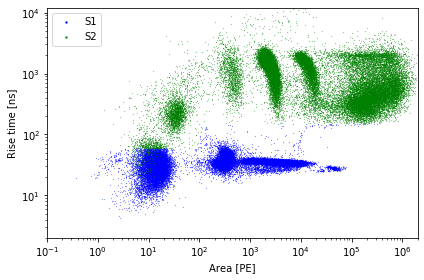

In [695]:
fig = plt.figure(figsize=(6,4))
plt.scatter(s1['area'],s1['rise_time'], s= 0.1, marker='.',color='b',label='S1')
plt.scatter(s2['area'],s2['rise_time'], s= 0.1, marker='.',color='g',label='S2')
#plt.scatter(s['area'],s['rise_time'], s= 1, marker='.',color='k',label='Unknown')
ax.annotate(' ',xy=(200, 80),  xycoords='data',
            xytext=(200, 20), textcoords='data',color = 'red',
            arrowprops=dict(arrowstyle = '-')
           )
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
plt.savefig('Checks/kr83_real_data_strax_class.pdf')
plt.show()

In [381]:
krcalpb = np.concatenate((s2,s1))

In [172]:
raw_peaks = peak_r

In [213]:
s2_rp = raw_peaks[raw_peaks['type'] == 2]
s1_rp = raw_peaks[raw_peaks['type'] == 1]

In [216]:
save_s1_final=[]
for j in clean_peaks:
    index = np.where(s1_rp['time']==j['time']) 
    if len(index[0]) != 0:
        save_s1_final.append(index[0][0])

In [217]:
save_s2_final=[]
for j in clean_peaks:
    index = np.where(s2_rp['time']==j['time']) 
    if len(index[0]) != 0:
        save_s2_final.append(index[0][0])

In [177]:
s1_peaks = raw_peaks.copy()

In [366]:
s1_p = raw_peaks[raw_peaks['type'] == 1]

In [367]:
s2_p = raw_peaks[raw_peaks['type'] == 2]

In [368]:
s1_peaks = s1_p[save_s1_final]

In [369]:
s2_peaks = raw_peaks.copy()

In [370]:
s2_peaks = s2_p[save_s2_final]

In [384]:
krcalpeaks['max_gap'] = krcalpb['rise_time'] #replace max_gap with rise_time since idk how to add something new

Single Electron analysis

Here I am going to 'cut out' the single electrons and looking at the statistic of the data

In [1367]:
krcalpeaks_SE = krcalpeaks[krcalpeaks['max_gap'] <= 500]
krcalpeaks_SE = krcalpeaks_SE[krcalpeaks_SE['max_gap'] >= 100]

In [1368]:
krcalpeaks_SE = krcalpeaks_SE[krcalpeaks_SE['area'] <= 100]
krcalpeaks_SE = krcalpeaks_SE[krcalpeaks_SE['area'] >= 10]

Further we select areas for the other events of interest such as kr and argon to compare

In [1002]:
krcalpeaks_krs1 = krcalpeaks[krcalpeaks['max_gap'] <= 600]
krcalpeaks_krs1 = krcalpeaks_krs1[krcalpeaks_krs1['max_gap'] >= 100]
krcalpeaks_krs1 = krcalpeaks_krs1[krcalpeaks_krs1['area'] <= 50]
krcalpeaks_krs1 = krcalpeaks_krs1[krcalpeaks_krs1['area'] >= 20]

Text(0.5, 1.0, 'Single Electron Cuts from Calibration Data')

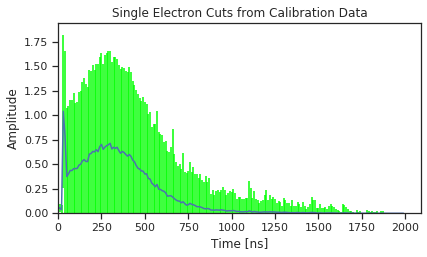

In [1003]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(200)*10, 
             krcalpeaks_SE['data'].mean(0), 
             np.std(krcalpeaks_SE['data'], axis = 0), 
             ecolor = 'lime')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('Time [ns]')
plt.ylabel('Amplitude')
plt.title('Single Electron Cuts from Calibration Data')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

In [1023]:
store_center = np.zeros((np.size(krcalpeaks_SE)))
for kl in np.arange(np.size(krcalpeaks_SE)):
    store_center[kl] = np.argwhere(krcalpeaks_SE['data'][kl,:] == np.max(krcalpeaks_SE['data'][kl,:]))
#np.size(np.argwhere(krcalpeaks_SE['data'] ==np.max (krcalpeaks_SE['data'], axis = 1)))

In [1048]:
def center_waveform(data):
    center_data = np.zeros((np.size(data),400))
    store_center = np.zeros((np.size(data)))
    for kl in np.arange(np.size(data)):
        store_center[kl] = np.argwhere(data['data'][kl,:] == np.max(data['data'][kl,:]))
        for jl in np.arange(200): #I know there has to be a better way to do this
            #print(200 - int(store_center[kl]) +jl)
            #print(data['data'][kl,jl])
            #print(jl)
            center_data[kl, 200 - int(store_center[kl]) +jl] = data['data'][kl,jl]
    print(np.max(store_center))
    return center_data

In [1082]:
def center_area_waveform(data):
    center_data = np.zeros((np.size(data),400))
    store_center = np.zeros((np.size(data)))
    for kl in np.arange(np.size(data)):
        for jl in np.arange(200): #I know there has to be a better way to do this
            #print(200 - int(store_center[kl]) +jl)
            #print(data['data'][kl,jl])
            #print(jl)
            center_data[kl, 
                        200 + (int(np.around(data['area_decile_from_midpoint'][kl,0], -1)) //10) +jl] = data['data'][kl,jl]
    print(np.max(store_center))
    return center_data

In [1064]:
krcalpeaks_SE.dtype

dtype([(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Length of the interval in samples', 'length'), '<i4'), (('Width of one sample [ns]', 'dt'), '<i2'), (('Channel/PMT number', 'channel'), '<i2'), (('Classification of the peak(let)', 'type'), 'i1'), (('Integral across channels [PE]', 'area'), '<f4'), (('Integral per channel [PE]', 'area_per_channel'), '<f4', (248,)), (('Number of hits contributing at least one sample to the peak ', 'n_hits'), '<i4'), (('Waveform data in PE/sample (not PE/ns!)', 'data'), '<f4', (200,)), (('Peak widths in range of central area fraction [ns]', 'width'), '<f4', (11,)), (('Peak widths: time between nth and 5th area decile [ns]', 'area_decile_from_midpoint'), '<f4', (11,)), (('Does the channel reach ADC saturation?', 'saturated_channel'), 'i1', (248,)), (('Total number of saturated channels', 'n_saturated_channels'), '<i2'), (('Hits within tight range of mean', 'tight_coincidence'), '<i2'), (('Largest gap between hits inside peak [ns]', 'max_gap'

Text(0.5, 1.0, 'Single Electron Centered by Peak Max')

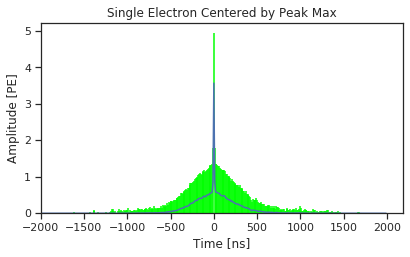

In [1086]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(-200,200)*10, 
             store_center.mean(0), 
             np.std(store_center, axis = 0), 
             ecolor = 'lime')
plt.ylim(0)
plt.xlim(-2000)
plt.xlabel('Time [ns]')
plt.ylabel('Amplitude [PE]')
plt.title('Single Electron Centered by Peak Max')

Text(0.5, 1.0, 'Single Electron Centered by Area')

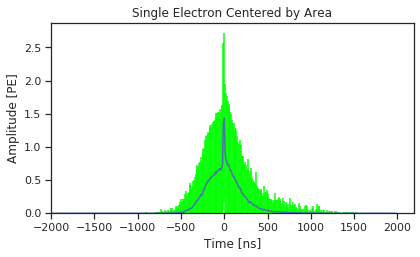

In [1085]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(-200,200)*10, 
             store_area_center.mean(0), 
             np.std(store_area_center, axis = 0), 
             ecolor = 'lime')
plt.ylim(0)
plt.xlim(-2000)
plt.xlabel('Time [ns]')
plt.ylabel('Amplitude [PE]')
plt.title('Single Electron Centered by Area')

In [1370]:
krcalpeaks_SE['data']

times = np.array([])
for i in range(len(krcalpeaks_SE['data'])):
    add = np.arange(1,201)
    times = np.append(times,add)
    
times.size

397000

In [1371]:
flat_data = np.reshape(krcalpeaks_SE['data'], [len(krcalpeaks_SE['data'])*200])

In [1374]:
import matplotlib as mpl
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat='%1.1f', offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

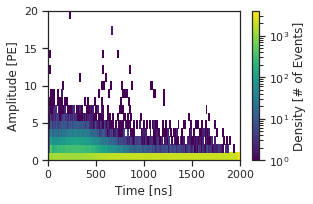

In [1389]:
fig = plt.figure(figsize=(4.5,3))
dx = np.linspace(0,2000,200)
dy = np.linspace(0,20,20)
plt.hist2d(times*10, flat_data,bins=[dx,dy],norm=mpl.colors.LogNorm(),cmap='viridis')
plt.xlabel("Time [ns]")
order = 2
#plt.xticks
plt.ylabel("Amplitude [PE]")
plt.colorbar(label = "Density [# of Events]")
plt.tight_layout()
plt.savefig("./Qual_img_pc/2dhist_SEv2.pdf")

We note that at around time = 30ns there is a increase in the density of events with higher amplitudes

upond futher examination we realized this was a result of how signals are recarded, in such a way that the starting peak will be most often in this region. In other words it is an artifact with no real physical significane

Text(0, 0.5, 'Amplitude')

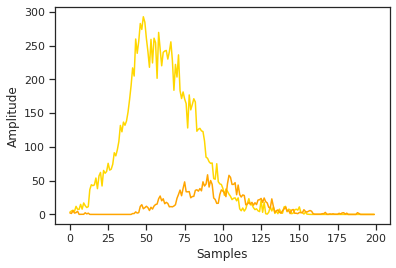

In [1091]:
fig = plt.figure(figsize=(6,4)) #S2 examples for kr83 and ar37
#plt.plot(krcalpeaks_SE['data'][505,:])
#plt.plot(krcalpeaks_krs1['data'][9,:], 'red')
plt.plot(krcalpeaks_krs2['data'][1,:], 'gold')
#plt.plot(krcalpeaks_Ars1['data'][5,:], 'purple')
plt.plot(krcalpeaks_Ars2['data'][5,:], 'orange')
#plt.yscale('log')
#plt.ylim(1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

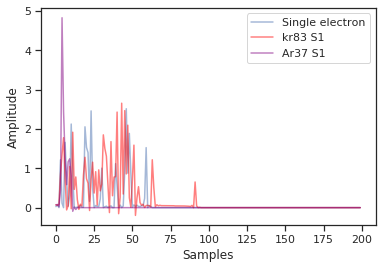

In [1123]:
fig = plt.figure(figsize=(6,4)) #single electron + kr83 s1 + Ar37 s1 examples
plt.plot(krcalpeaks_SE['data'][55,:], alpha = 0.5, label = 'Single electron')
plt.plot(krcalpeaks_krs1['data'][115,:], 'red', alpha = 0.5, label = 'kr83 S1')
#plt.plot(krcalpeaks_krs2['data'][1,:], 'gold')
plt.plot(krcalpeaks_Ars1['data'][15,:], 'purple', alpha = 0.5, label = 'Ar37 S1')
#plt.plot(krcalpeaks_Ars2['data'][5,:], 'orange')
#plt.yscale('log')
#plt.ylim(1)
plt.legend()
plt.xlabel('Samples')
plt.ylabel("Amplitude")

In [862]:
krcalpeaks_krs2 = krcalpeaks[krcalpeaks['max_gap'] <= 2000]
krcalpeaks_krs2 = krcalpeaks_krs2[krcalpeaks_krs2['max_gap'] >= 500]
krcalpeaks_krs2 = krcalpeaks_krs2[krcalpeaks_krs2['area'] <= 30000]
krcalpeaks_krs2 = krcalpeaks_krs2[krcalpeaks_krs2['area'] >= 10000]

In [857]:
krcalpeaks_Ars1 = krcalpeaks[krcalpeaks['max_gap'] <= 20]
krcalpeaks_Ars1 = krcalpeaks_Ars1[krcalpeaks_Ars1['max_gap'] >= 10]
krcalpeaks_Ars1 = krcalpeaks_Ars1[krcalpeaks_Ars1['area'] <= 20]
krcalpeaks_Ars1 = krcalpeaks_Ars1[krcalpeaks_Ars1['area'] >= 10]

In [864]:
krcalpeaks_Ars2 = krcalpeaks[krcalpeaks['max_gap'] <= 2000]
krcalpeaks_Ars2 = krcalpeaks_Ars2[krcalpeaks_Ars2['max_gap'] >= 500]
krcalpeaks_Ars2 = krcalpeaks_Ars2[krcalpeaks_Ars2['area'] <= 3000]
krcalpeaks_Ars2 = krcalpeaks_Ars2[krcalpeaks_Ars2['area'] >= 1000]

In [759]:
single_e_sim_cut = np.load("single_e_sim_cut.npy")
import matplotlib.gridspec as gridspec

In [814]:
krcalpeaks_SE_L1 = np.array(L1_norm(krcalpeaks_SE))
#krcalpeaks_SE_L1 = np.reshape(krcalpeaks_SE_L1, [np.shape(krcalpeaks_SE['data'])])
single_e_sim_cut_L1 = np.array(L1_norm(single_e_sim_cut))

In [978]:
store_krcalpeaks_SE = krcalpeaks_SE
store_single_e_sim_cut = single_e_sim_cut


In [979]:
krcalpeaks_SE = krcalpeaks_SE[krcalpeaks_SE['dt'] == 10]
single_e_sim_cut = single_e_sim_cut[single_e_sim_cut['dt'] == 10]

Comparison of single electron simulation vs calibration data

<ipython-input-1342-9697273ba2f4>:36: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



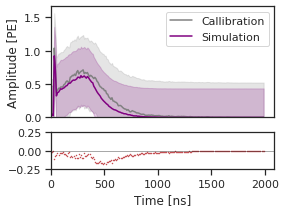

In [1342]:
##import pyhf
#import pyhf.contrib.viz.brazil

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.2)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.plot(np.arange(200)*10, 
             krcalpeaks_SE['data'].mean(0),  
             alpha = 1, color = 'grey', ms=0.5, label = "Callibration")
ax0.plot(np.arange(200)*10, 
             single_e_sim_cut['data'].mean(0), 
             alpha = 1, color = 'purple', ms=0.5, label = "Simulation")

ax1.scatter(np.arange(200)*10,
            single_e_sim_cut['data'].mean(0)-krcalpeaks_SE['data'].mean(0),
            marker = 'x', s=0.3, color = 'r')
#artists = pyhf.contrib.viz.brazil.plot_results(test_pois, results, ax0=ax0)
ax0.fill_between(np.arange(200)*10, krcalpeaks_SE['data'].mean(0) - np.std(krcalpeaks_SE['data']),
                 krcalpeaks_SE['data'].mean(0) + np.std(krcalpeaks_SE['data']), 
                 alpha=0.2, color = "grey")
ax0.fill_between(np.arange(200)*10, single_e_sim_cut['data'].mean(0) - np.std(single_e_sim_cut['data']),
                 single_e_sim_cut['data'].mean(0) + np.std(single_e_sim_cut['data']), 
                 alpha=0.2, color = "purple")
ax0.set_ylim(0)
ax0.set_xlim(0)
#ax0.set_yticks(None)
ax1.set_xlabel('Time [ns]')
ax0.tick_params(bottom=False, labelbottom=False)
ax1.set_ylim(-0.25,0.25)
ax1.set_xlim(0)
ax1.hlines(0,0,2500,color='k',alpha=0.75,linewidth=0.5)
ax0.set_ylabel('Amplitude [PE]')
ax0.legend()
#ax0.tight_layout()
plt.tight_layout()
plt.savefig("./Qual_img_pc/single_electrons_sim_v_calv3.pdf",bbox_inches='tight')

In [315]:
s1_peaks_decile =  index_of_fraction(s1_peaks, desired_widths)

In [316]:
s2_peaks_decile =  index_of_fraction(s2_peaks, desired_widths)

In [317]:
s1_peaks_decile_f = np.diff(s1_peaks_decile,n=1,axis = 1)

In [318]:
s2_peaks_decile_f = np.diff(s2_peaks_decile,n=1,axis = 1)

In [319]:
s1_peaks_decile_f_L1 = L1_norm_c(s1_peaks_decile_f)

error has occured, data minimum is NOT 0


<ipython-input-273-79d70c346d22>:7: RuntimeWarning: invalid value encountered in true_divide
  peaks_L1[aa,:] = data[aa,:]/np.sum(data[aa,:])


Examining Area Deciles

Text(0.5, 1.0, 'Mean S1 + STD from Strax Classification')

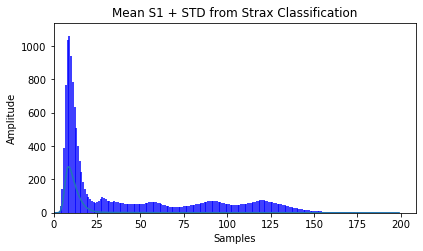

In [450]:
#some sanity checks 
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(200), 
             s1_peaks['data'].mean(0), 
             np.std(s1_peaks['data'], axis = 0), 
             ecolor = 'blue')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('Samples')
plt.ylabel('Amplitude [PE]')
#plt.title('Mean S1 + STD from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

Text(0.5, 1.0, 'Mean S2 + STD from Strax Classification')

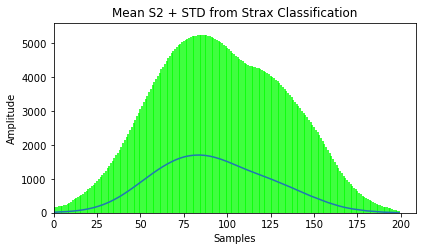

In [451]:
#some sanity checks 
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(200), 
             s2_peaks['data'].mean(0), 
             np.std(s2_peaks['data'], axis = 0), 
             ecolor = 'lime')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('Samples')
plt.ylabel('Amplitude [PE]')
#plt.title('Mean S2 + STD from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

Text(0.5, 1.0, 'Mean S1 area decile from Strax Classification')

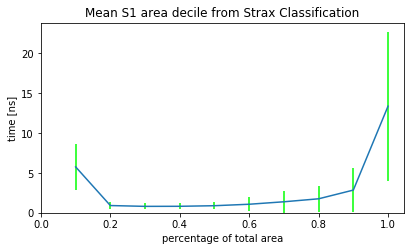

In [326]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar((np.arange(10)+1)/10, 
             s1_peaks_decile_f.mean(0), 
             np.std(s1_peaks_decile_f, axis = 0), 
             ecolor = 'lime')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('percentage of total area')
plt.ylabel('time [ns]')
plt.title('Mean S1 area decile from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

Text(0.5, 1.0, 'Mean S2 area decile from Strax Classification')

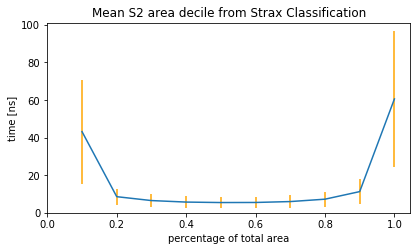

In [327]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar((np.arange(10)+1)/10,
             s2_peaks_decile_f.mean(0),
             np.std(s2_peaks_decile_f, axis = 0), 
             ecolor = 'orange')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('percentage of total area')
plt.ylabel('time [ns]')
plt.title('Mean S2 area decile from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

In [1172]:
from scipy import interpolate

In [1179]:
y

array([ 5.7614155 ,  0.910589  ,  0.8076574 ,  0.81644356,  0.8896538 ,
        1.0742353 ,  1.3835353 ,  1.7574553 ,  2.8506336 , 13.381389  ],
      dtype=float32)

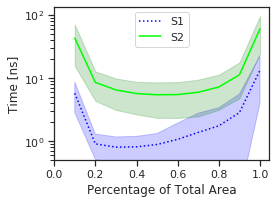

In [1330]:
fig = plt.figure(figsize=(4,3))

x = (np.arange(10)+1)/10
y = s1_peaks_decile_f.mean(0)

tck,u     = interpolate.splprep( [x,y] ,s = 0 )
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)

plt.plot((np.arange(10)+1)/10, 
         s1_peaks_decile_f.mean(0),
         color = 'blue',
         linestyle='dotted')
'''plt.errorbar((np.arange(10)+1)/10,
             s2_peaks_decile_f.mean(0),
             np.std(s2_peaks_decile_f, axis = 0), 
             ecolor = 'lime', color = 'lime', ds='steps-mid')'''
plt.plot((np.arange(10)+1)/10,
         s2_peaks_decile_f.mean(0),
         color = 'lime')
plt.fill_between((np.arange(10)+1)/10, s1_peaks_decile_f.mean(0) - np.std(s1_peaks_decile_f, axis = 0),
                 s1_peaks_decile_f.mean(0) + np.std(s1_peaks_decile_f, axis = 0), 
                 alpha=0.2, color = "blue")
plt.fill_between((np.arange(10)+1)/10, s2_peaks_decile_f.mean(0) - np.std(s2_peaks_decile_f, axis = 0),
                 s2_peaks_decile_f.mean(0) + np.std(s2_peaks_decile_f, axis = 0), 
                 alpha=0.2, color = "green")
plt.legend(['S1', 'S2'], loc = "upper center")
plt.yscale('log')
plt.ylim(0.5)
plt.xlim(0)
plt.xlabel('Percentage of Total Area')
plt.ylabel('Time [ns]')
plt.tight_layout()
#plt.title('Mean S1 and S2 Area Decile and STD from Strax Classification')
plt.savefig('./Qual_img_pc/Mean_std_area_decileV2.pdf')

In [ ]:
from scipy import interpolate

fig = plt.figure(figsize=(4,3))
#plt.errorbar((np.arange(10)+1)/10, 
#             s1_peaks_decile_f.mean(0), 
#             np.std(s1_peaks_decile_f, axis = 0), 
#             ecolor = 'blue', color = 'blue',
#             linestyle='dotted', ds='steps-mid')
plt.plot((np.arange(10)+1)/10, 
        s1_peaks_decile_f.mean(0),
        color = 'blue',
        linestyle='dotted')
'''plt.errorbar((np.arange(10)+1)/10,
             s2_peaks_decile_f.mean(0),
             np.std(s2_peaks_decile_f, axis = 0), 
             ecolor = 'lime', color = 'lime', ds='steps-mid')'''
plt.plot((np.arange(10)+1)/10,
         s2_peaks_decile_f.mean(0),
         color = 'lime')
plt.fill_between((np.arange(10)+1)/10, s1_peaks_decile_f.mean(0) - np.std(s1_peaks_decile_f, axis = 0),
                 s1_peaks_decile_f.mean(0) + np.std(s1_peaks_decile_f, axis = 0), 
                 alpha=0.2, color = "blue")
plt.fill_between((np.arange(10)+1)/10, s2_peaks_decile_f.mean(0) - np.std(s2_peaks_decile_f, axis = 0),
                 s2_peaks_decile_f.mean(0) + np.std(s2_peaks_decile_f, axis = 0), 
                 alpha=0.2, color = "green")
plt.legend(['S1', 'S2'], loc = "upper center")
plt.yscale('log')
plt.ylim(0.5)
plt.xlim(0)
plt.xlabel('Percentage of Total Area')
plt.ylabel('Time [ns]')
#plt.title('Mean S1 and S2 Area Decile and STD from Strax Classification')
plt.savefig('Qual_img_pc/Mean_std_area_decile.pdf')

In [ ]:
plt.plt((s1_peaks_decile_f.mean(0), 
        #np.std(s1_peaks_decile_f, axis = 0), 
         color = 'blue', # color = 'black',
         linestyle='dotted')

Text(0.5, 1.0, 'Mean S1(green) vs Mean S2(orange) area decile from Strax Classification')

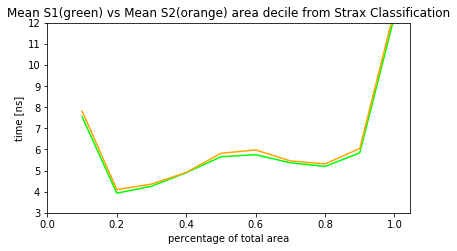

In [289]:
fig = plt.figure(figsize=(6.5,3.5))
plt.plot((np.arange(10)+1)/10, 
             s1_peaks_decile_f.mean(0), 
             'lime')
plt.plot((np.arange(10)+1)/10,
             s2_peaks_decile_f.mean(0),
             'orange')
plt.ylim(3,12)
plt.xlim(0)
plt.xlabel('percentage of total area')
plt.ylabel('time [ns]')
plt.title('Mean S1(green) vs Mean S2(orange) area decile from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')
#Text(0.5, 1.0, 'Mean S1 area decile from Strax Classification'

Text(0.5, 1.0, 'Mean S2 - S1 area decile from Strax Classification')

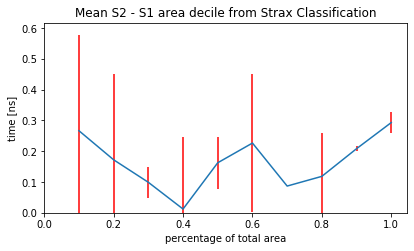

In [271]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar((np.arange(10)+1)/10,
             s2_peaks_decile_f.mean(0)-s1_peaks_decile_f.mean(0),
             np.std(s2_peaks_decile_f, axis = 0) - np.std(s1_peaks_decile_f, axis = 0), 
             ecolor = 'red')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('percentage of total area')
plt.ylabel('time [ns]')
plt.title('Mean S2 - S1 area decile from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

In [ ]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar((np.arange(10)+1)/10,
             s2_peaks_decile_f.mean(0), 
             np.std(s2_peaks_decile_f, axis = 0), 
             ecolor = 'orange')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('time in nano seconds')
plt.ylabel('decile')
#plt.title('S2 area decile from Strax Classification')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

In [322]:
peak_decile = np.concatenate((s2_peaks_decile_f,s1_peaks_decile_f))
peak_decile_zeros = np.concatenate((peak_decile, np.zeros((143,10))))

In [248]:
def export_data(data, export_name):
    data_vec = np.reshape(data, (len(data[1,:])*len(data[:,1])))
    
    import struct

    f=open(export_name,"wb")
    export_TL = data_vec
    export_TL.dtype
    myfmt='f'*len(export_TL)
    #  You can use 'd' for double and < or > to force endinness
    bin=struct.pack(myfmt,*export_TL)
    f.write(bin)
    f.close()
    #export name must be a string with the extnesion.raw

In [323]:
export_data(peak_decile_zeros, 'kr83cal_decile_data_v2.raw')

In [48]:
kr83_peaks_clean = np.concatenate((s2_peaks,s1_peaks))

Examining SOM classification for the different data sets, Raw data

In [50]:
from PIL import Image
img = Image.open('/home/luissanchez25/im_kr83_sim_real_rc_30x30_5lbl.0.rmpmap.png')
imgGray = img.convert('L')
imgGray.save('/home/luissanchez25/im_kr83_sim_real_rc_30x30_5lbl.0.rmpmap_gray.png')

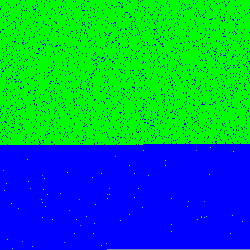

In [25]:
img.show()

In [97]:
img_color = np.array(img)
img_color_2d = img_color.reshape((250*250,3))

In [98]:
label = -1 * np.ones(img_color.shape[:-1])

In [99]:
colors = np.unique(img_color_2d, axis = 0)
for i, color in enumerate(colors):  # argwhere
    label[np.all((img_color == color), axis = 2)] = i

In [100]:
label_vec = label.reshape((250*250))
label_vec_nonzero = label_vec[:-143]

In [102]:
class0 = som_class_peaks[som_class_peaks['type'] == 0]
class1 = som_class_peaks[som_class_peaks['type'] == 1]
class2 = som_class_peaks[som_class_peaks['type'] == 2]

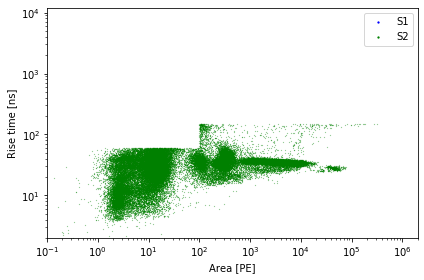

In [103]:
fig = plt.figure(figsize=(6,4))
plt.scatter(class0['area'],class0['rise_time'], s= 0.1, marker='.',color='b', label = "S1")
plt.scatter(class1['area'],class1['rise_time'], s= 0.1, marker='.',color='g', label = "S2")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
plt.savefig('Checks/kr83_real_data_recall_synth_trained_SOM_class.pdf')
plt.show()

In [163]:
img_simtr_rr_5 = Image.open('/home/luissanchez25/im_kr83_sim_real_rc_30x30_5lbl2.0.rmpmap.png')

In [164]:
img_color_simtr_rr_5 = np.array(img_simtr_rr_5)
img_color_simtr_rr_5_2d = img_color_simtr_rr_5.reshape((250*250,3))

In [166]:
label_simtr_rr_5 = -1 * np.ones(img_color_simtr_rr_5.shape[:-1])

In [167]:
colors_simtr_rr_5 = np.unique(img_color_simtr_rr_5_2d, axis = 0)
for i, color in enumerate(colors_simtr_rr_5):  # argwhere
    label_simtr_rr_5[np.all((img_color_simtr_rr_5 == color), axis = 2)] = i

In [168]:
label_simtr_rr_5_vec = label.reshape((250*250))
label_simtr_rr_5_vec_nonzero = label_vec[:-143]

In [169]:
som_class_peaks_simtr_rr_5 = np.concatenate((s2,s1))
som_class_peaks_simtr_rr_5['type'] = label_simtr_rr_5_vec_nonzero

In [171]:
class0_simtr_rr_5 = som_class_peaks_simtr_rr_5[som_class_peaks_simtr_rr_5['type'] == 0]
class1_simtr_rr_5 = som_class_peaks_simtr_rr_5[som_class_peaks_simtr_rr_5['type'] == 1]
class2_simtr_rr_5 = som_class_peaks_simtr_rr_5[som_class_peaks_simtr_rr_5['type'] == 2]
class3_simtr_rr_5 = som_class_peaks_simtr_rr_5[som_class_peaks_simtr_rr_5['type'] == 3]
class4_simtr_rr_5 = som_class_peaks_simtr_rr_5[som_class_peaks_simtr_rr_5['type'] == 4] #empty vectors I believe
class5_simtr_rr_5 = som_class_peaks_simtr_rr_5[som_class_peaks_simtr_rr_5['type'] == 5]

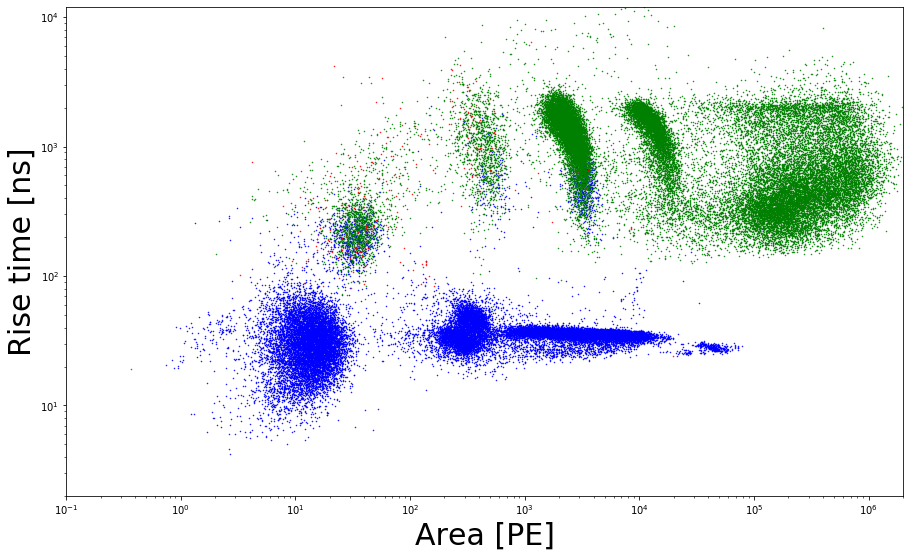

In [175]:
fig = plt.figure(figsize=(15,9))
plt.scatter(class0_simtr_rr_5['area'],class0_simtr_rr_5['rise_time'], s= 1, marker='.',color='b')
plt.scatter(class1_simtr_rr_5['area'],class1_simtr_rr_5['rise_time'], s= 1, marker='.',color='g')
plt.scatter(class2_simtr_rr_5['area'],class2_simtr_rr_5['rise_time'], s= 1, marker='.',color='red')
plt.scatter(class3_simtr_rr_5['area'],class3_simtr_rr_5['rise_time'], s= 1, marker='.',color='orange')
plt.scatter(class4_simtr_rr_5['area'],class4_simtr_rr_5['rise_time'], s= 1, marker='.',color='black')
plt.scatter(class5_simtr_rr_5['area'],class5_simtr_rr_5['rise_time'], s= 1, marker='.',color='purple')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]', fontsize = 30)
plt.ylabel('Rise time [ns]', fontsize = 30)
#plt.legend(markerscale=20, fontsize = 24)
plt.show()

Data with no cuts nor normalization, purely raw upsampled data

In [87]:
imgunft1 = Image.open('/home/luissanchez25/CONNvis_kr83_real_unfilt_30x30_80M.0.rmpmap.png')
imgGrayuft1 = img.convert('L')

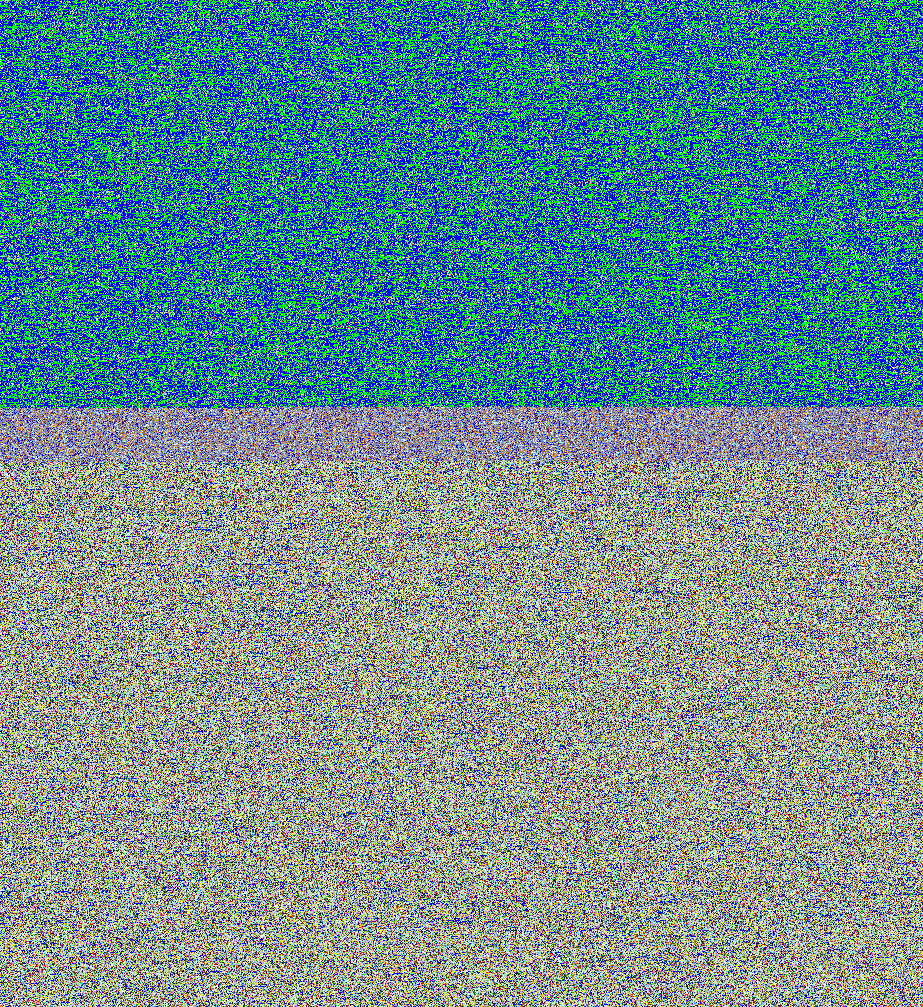

In [88]:
imgunft1.show()

In [110]:
img_color_unft1 = np.array(imgunft1)
img_color_2d_unft1 = img_color_unft1.reshape((923*1007,3))
label_uft1 = -1 * np.ones(img_color_unft1.shape[:-1])

In [111]:
colors_unft1 = np.unique(img_color_2d_unft1, axis = 0)
for ii, colori in enumerate(colors_unft1):  # argwhere
    label_uft1[np.all((img_color_unft1 == colori), axis = 2)] = ii

In [112]:
label_vec_label_uft1 = label_uft1.reshape((923*1007))
label_vec_nonzero_label_uft1 = label_vec_label_uft1

In [113]:
som_class_peaks2 = np.concatenate((s2,s1))
som_class_peaks_all = np.concatenate((som_class_peaks2,s))
som_class_peaks_all['type'] = label_vec_nonzero_label_uft1

In [ ]:
np.max(label_uft1)

In [114]:
cl0 = som_class_peaks_all[som_class_peaks_all['type'] == 0]
cl1 = som_class_peaks_all[som_class_peaks_all['type'] == 1]
cl2 = som_class_peaks_all[som_class_peaks_all['type'] == 2]
cl3 = som_class_peaks_all[som_class_peaks_all['type'] == 3]
cl4 = som_class_peaks_all[som_class_peaks_all['type'] == 4]
cl5 = som_class_peaks_all[som_class_peaks_all['type'] == 5]
cl6 = som_class_peaks_all[som_class_peaks_all['type'] == 6]
cl7 = som_class_peaks_all[som_class_peaks_all['type'] == 7]
cl8 = som_class_peaks_all[som_class_peaks_all['type'] == 8]
cl9 = som_class_peaks_all[som_class_peaks_all['type'] == 9]
cl10 = som_class_peaks_all[som_class_peaks_all['type'] == 10]
cl11 = som_class_peaks_all[som_class_peaks_all['type'] == 11]
cl12 = som_class_peaks_all[som_class_peaks_all['type'] == 12]
cl13 = som_class_peaks_all[som_class_peaks_all['type'] == 13]
cl14 = som_class_peaks_all[som_class_peaks_all['type'] == 14]
cl15 = som_class_peaks_all[som_class_peaks_all['type'] == 15]
cl16 = som_class_peaks_all[som_class_peaks_all['type'] == 16]
cl17 = som_class_peaks_all[som_class_peaks_all['type'] == 17]
cl18 = som_class_peaks_all[som_class_peaks_all['type'] == 18]
cl19 = som_class_peaks_all[som_class_peaks_all['type'] == 19]
cl20 = som_class_peaks_all[som_class_peaks_all['type'] == 20]
cl21 = som_class_peaks_all[som_class_peaks_all['type'] == 21]
cl22 = som_class_peaks_all[som_class_peaks_all['type'] == 22]
cl23 = som_class_peaks_all[som_class_peaks_all['type'] == 23]
cl24 = som_class_peaks_all[som_class_peaks_all['type'] == 24]
cl25 = som_class_peaks_all[som_class_peaks_all['type'] == 25]

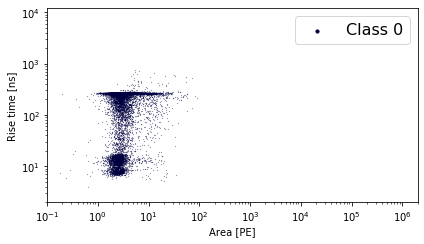

In [213]:
fig = plt.figure(figsize=(6,3.5))
plt.scatter(cl0['area'],cl0['rise_time'], s= 0.1, marker='.',color=(0,0,64.0/255.0), label = "Class 0")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
#plt.scatter(cl2['area'],cl2['rise_time'], s= 1, marker='.',color='r', label = "Class 2")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class0.png')
plt.show()

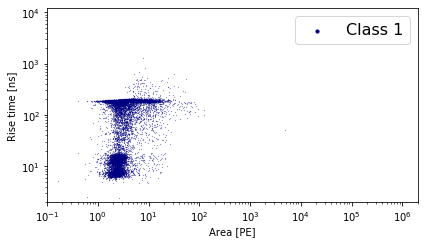

In [214]:
fig = plt.figure(figsize=(6,3.5))
plt.scatter(cl1['area'],cl1['rise_time'], s= 0.1, marker='.',color=(0,0,128.0/255.0), label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
#plt.scatter(cl2['area'],cl2['rise_time'], s= 1, marker='.',color='r', label = "Class 2")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class1.png')
plt.show()

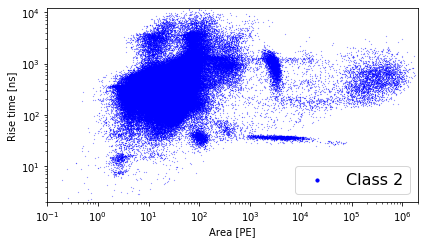

In [215]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl2['area'],cl2['rise_time'], s= 0.1, marker='.',color=(0,0,1), label = "Class 2")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class2.png')
plt.show()

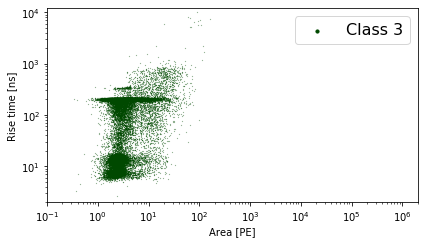

In [216]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl3['area'],cl3['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(0,64.0/225.0,0), 
            label = "Class 3")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class3.png')
plt.show()

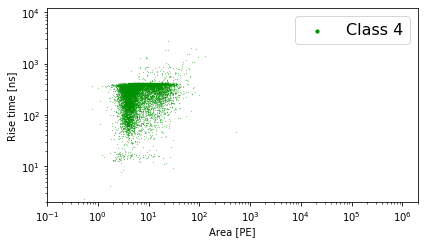

In [217]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl4['area'],cl4['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(0,128.0/225.0,0), 
            label = "Class 4")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class4.png')
plt.show()

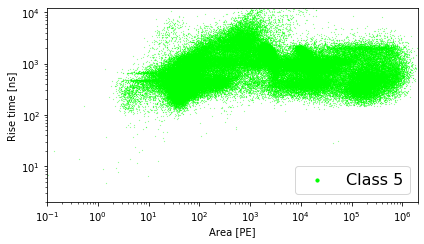

In [218]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl5['area'],cl5['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(0,1,0), 
            label = "Class 5")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class5.png')
plt.show()

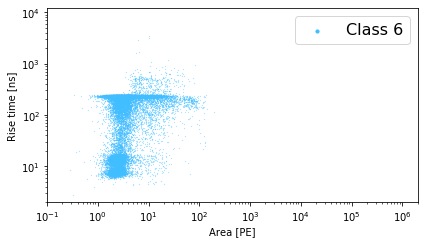

In [219]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl6['area'],cl6['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(45.0/(45+132),132.0/(45+132),1), 
            label = "Class 6")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class6.png')
plt.show()

In [162]:
color=(254/(254+146+43),146/(254+146+43),43/(254+146+43))
color=(173/(173+226+255),226/(173+226+255),255/(173+226+255))


0.3409090909090909

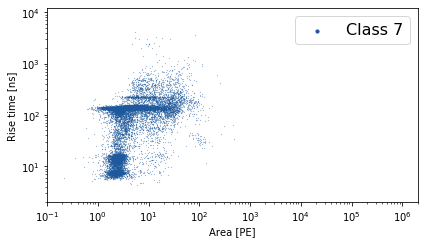

In [220]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl7['area'],
            cl7['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(47/(47+146+225),146/(47+146+225),255/(47+146+225)), 
            label = "Class 7")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class7.png')
plt.show()

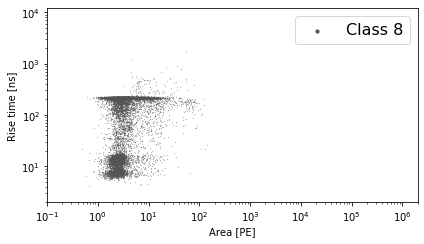

In [221]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl8['area'],
            cl8['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(0.33,0.33,0.33), 
            label = "Class 8")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class8.png')
plt.show()

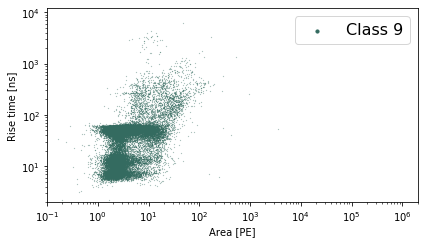

In [222]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl9['area'],cl9['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(118/(118+241+217),241/(118+241+217),217/(118+241+217)), 
            label = "Class 9")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class9.png')
plt.show()

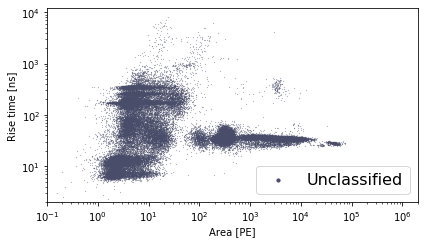

In [223]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl10['area'],cl10['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(127/(127+133+182),133/(127+133+182),182/(127+133+182)), 
            label = "Unclassified")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class_unkwn.png')
plt.show()

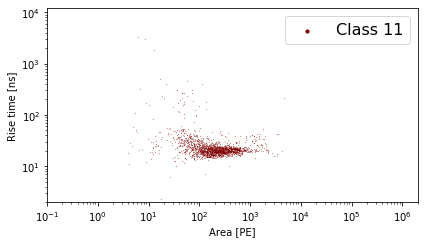

In [224]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl11['area'],cl11['rise_time'], s= 0.1, marker='.',color=(128/255,0,0), label = "Class 11")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class11.png')
plt.show()

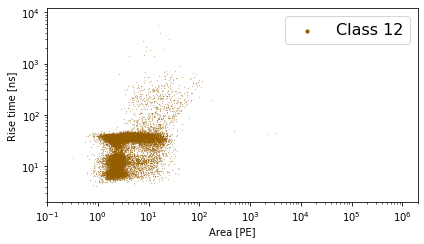

In [225]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl12['area'],cl12['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(148/255,93/255,0), 
            label = "Class 12")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class12.png')
plt.show()

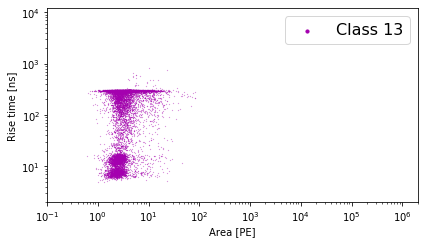

In [226]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl13['area'],cl13['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(164/255,0,175/255), label = "Class 13")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class13.png')
plt.show()

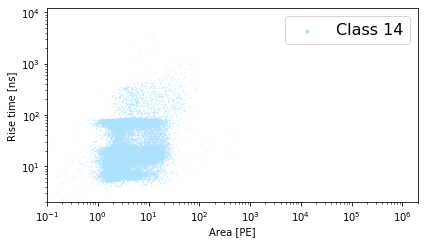

In [230]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl14['area'],cl14['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(173/255,226/255,1), 
            label = "Class 14")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class14.png')
plt.show()

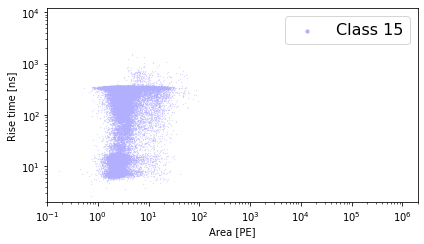

In [229]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl15['area'],cl15['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(179/255,175/255,1), 
            label = "Class 15")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class15.png')
plt.show()

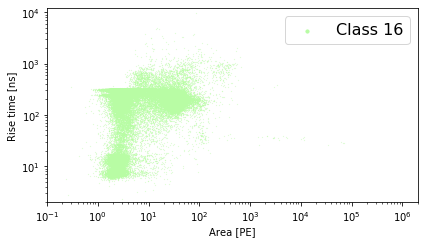

In [231]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl16['area'],cl16['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(184/255,252/255,164/255), 
            label = "Class 16")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class16.png')
plt.show()

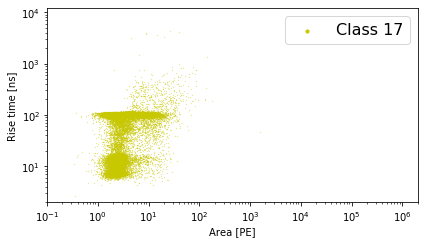

In [232]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl17['area'],cl17['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(200/255,200/255,0), 
            label = "Class 17")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class17.png')
plt.show()

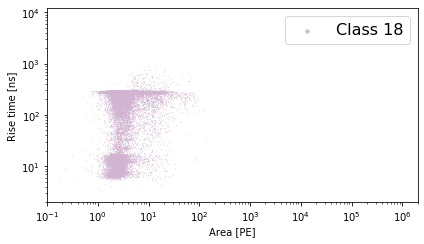

In [233]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl18['area'],cl18['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(210/255,180/255,210/255), 
            label = "Class 18")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class18.png')
plt.show()

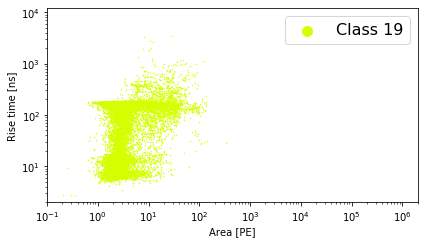

In [234]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl19['area'],cl19['rise_time'], 
            s= 1, 
            marker='.',
            color=(213/255,1,0), 
            label = "Class 19")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class19.png')
plt.show()

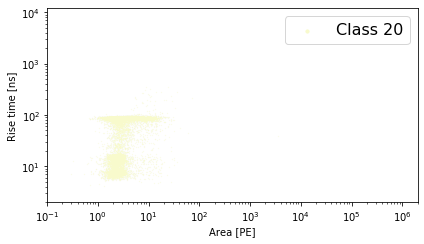

In [235]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl20['area'],cl20['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(248/255,250/255,204/255), 
            label = "Class 20")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class20.png')
plt.show()

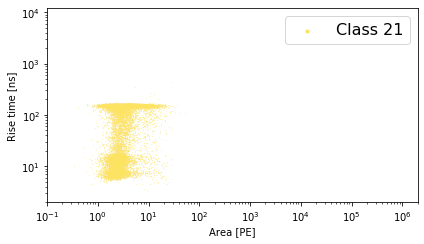

In [236]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl21['area'],cl21['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(252/255,228/255,98/255), 
            label = "Class 21")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class21.png')
plt.show()

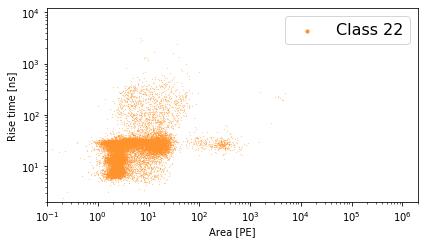

In [237]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl22['area'],cl22['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(254/255,146/255,43/255), 
            label = "Class 22")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class22.png')
plt.show()

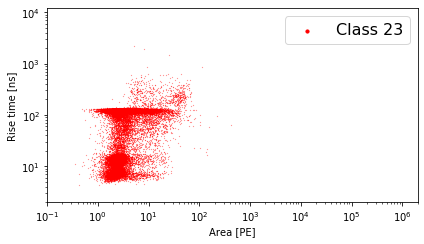

In [238]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl23['area'],cl23['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(1,0,0), 
            label = "Class 23")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class23.png')
plt.show()

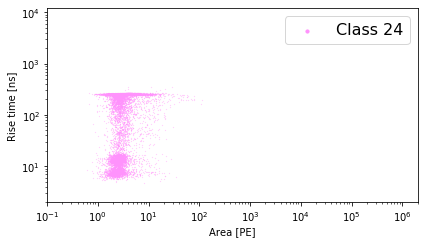

In [239]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl24['area'],cl24['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(1,146/255,252/255), 
            label = "Class 24")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class24.png')
plt.show()

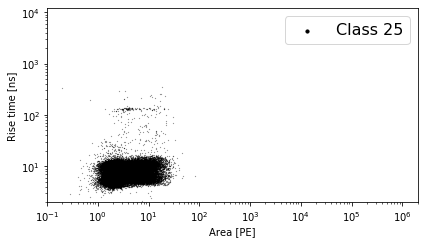

In [240]:
fig = plt.figure(figsize=(6,3.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl25['area'],cl25['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(0,0,0), 
            label = "Class 25")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 20)
plt.ylabel('Rise time [ns]')#, fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.tight_layout()
plt.savefig('Unfilt_kr83_1img/Class25.png')
plt.show()

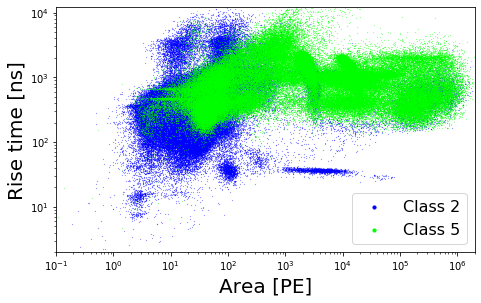

In [212]:
#series of plots combining promissing areas
fig = plt.figure(figsize=(7.5,4.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl2['area'],cl2['rise_time'], s= 0.1, marker='.',color=(0,0,1), label = "Class 2")
plt.scatter(cl5['area'],cl5['rise_time'], 
            s= 0.1, 
            marker='.',
            color=(0,1,0), 
            label = "Class 5")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]', fontsize = 20)
plt.ylabel('Rise time [ns]', fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.show()

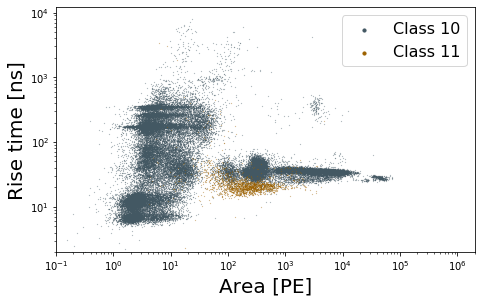

In [142]:
fig = plt.figure(figsize=(7.5,4.5))
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='b', label = "Class 1")
#plt.scatter(cl1['area'],cl1['rise_time'], s= 1, marker='.',color='g', label = "Class 1")
plt.scatter(cl10['area'],cl10['rise_time'], s= 0.1, marker='.',color=(173/(173+226+255),226/(173+226+255),255/(173+226+255)), label = "Class 10")
plt.scatter(cl11['area'],cl11['rise_time'], s= 0.1, marker='.',color=(148/(148+93),93/(148+93),0), label = "Class 11")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]', fontsize = 20)
plt.ylabel('Rise time [ns]', fontsize = 20)
plt.legend(markerscale=20, fontsize = 16)
plt.show()

In [26]:
img2 = Image.open('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')
imgGray2 = img.convert('L')
#imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')

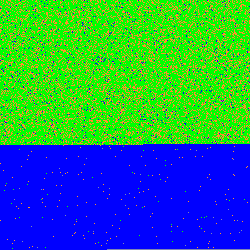

In [27]:
img2.show()

In [28]:
img_color2 = np.array(img2)
img_color_2d_2 = img_color2.reshape((250*250,3))

In [29]:
label2 = -1 * np.ones(img_color2.shape[:-1])

In [30]:
colors2 = np.unique(img_color_2d_2, axis = 0)
for i, color in enumerate(colors2):  # argwhere
    label2[np.all((img_color2 == color), axis = 2)] = i

In [31]:
label_vec2 = label2.reshape((250*250))
label_vec_nonzero2 = label_vec2[:-143]

In [62]:
som_class_peaks2 = np.concatenate((s2,s1))
som_class_peaks2['type'] = label_vec_nonzero2

In [63]:
np.size(som_class_peaks2)

62357

In [45]:
SOM_cls_peaks = np.concatenate((s2_tr,s1_tr))
SOM_cls_peaks['type'] = label_vec_nonzero2

In [34]:
green_som = SOM_cls_peaks[np.argwhere(SOM_cls_peaks['type'] == 1)]
orange_som = SOM_cls_peaks[np.argwhere(SOM_cls_peaks['type'] == 3)]

In [35]:
np.all(orange_som['type'] == 2)

False

In [36]:
class0_2 = som_class_peaks2[som_class_peaks2['type'] == 0]
class1_2 = som_class_peaks2[som_class_peaks2['type'] == 1]
class2_2 = som_class_peaks2[som_class_peaks2['type'] == 2]
class3_2 = som_class_peaks2[som_class_peaks2['type'] == 3]

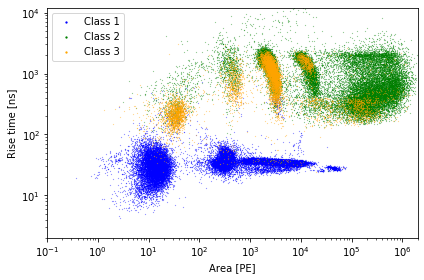

In [37]:
fig = plt.figure(figsize=(6,4))
plt.scatter(class0_2['area'],class0_2['rise_time'], s= 0.1, marker='.',color='b', label = "Class 1")
plt.scatter(class1_2['area'],class1_2['rise_time'], s= 0.1, marker='.',color='g', label = "Class 2")
plt.scatter(class3_2['area'],class3_2['rise_time'], s= 0.1, marker='.',color='orange', label = "Class 3")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
plt.savefig('Checks/kr83_real_data_3lbl_SOM_class.pdf')
plt.show()

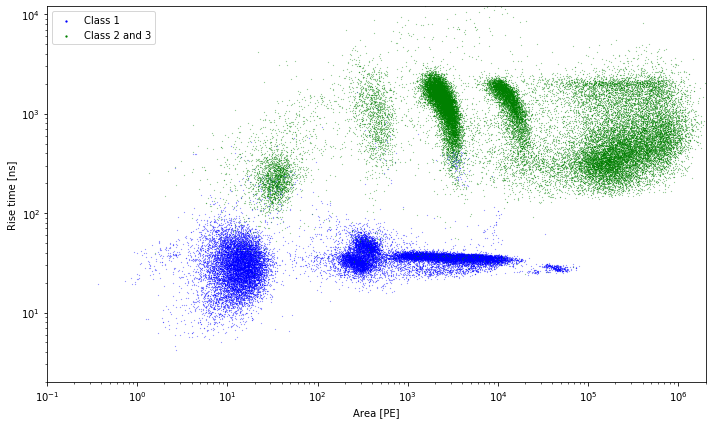

In [38]:
fig = plt.figure(figsize=(10,6))
plt.scatter(class0_2['area'],class0_2['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 1')
plt.scatter(class1_2['area'],class1_2['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 2 and 3')
plt.scatter(class3_2['area'],class3_2['rise_time'], s= 0.1, marker='.',color='g')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [380]:
imgv2 = Image.open('/home/luissanchez25/im_kr83_real_30x30_4lbl.0.rmpmap.png')
imgGrayv2 = img.convert('L')
#imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')

In [382]:
img_colorv2 = np.array(imgv2)
img_color_2d_v2 = img_colorv2.reshape((250*250,3))

In [411]:
labelv2 = -1 * np.ones(img_colorv2.shape[:-1])
colorv2 = np.unique(img_color_2d_v2, axis = 0)
for i, color in enumerate(colorv2):  # argwhere
    labelv2[np.all((img_colorv2 == color), axis = 2)] = i
label_vecv2 = labelv2.reshape((250*250))
label_vec_nonzerov2 = label_vecv2[:-143]

In [412]:
colorv2

array([[  0,   0, 255],
       [  0, 255,   0],
       [127, 133, 182],
       [164,   0, 175],
       [254, 146,  43]], dtype=uint8)

In [413]:
som_class_peaksv2 = np.concatenate((s2,s1))
som_class_peaksv2['type'] = label_vec_nonzerov2
#SOM_cls_peaks = np.concatenate((s2_tr,s1_tr))
#SOM_cls_peaks['type'] = label_vec_nonzero2

In [414]:
class0_v2 = som_class_peaksv2[som_class_peaksv2['type'] == 0]
class1_v2 = som_class_peaksv2[som_class_peaksv2['type'] == 1]
class2_v2 = som_class_peaksv2[som_class_peaksv2['type'] == 2]
class3_v2 = som_class_peaksv2[som_class_peaksv2['type'] == 3]
class4_v2 = som_class_peaksv2[som_class_peaksv2['type'] == 4]

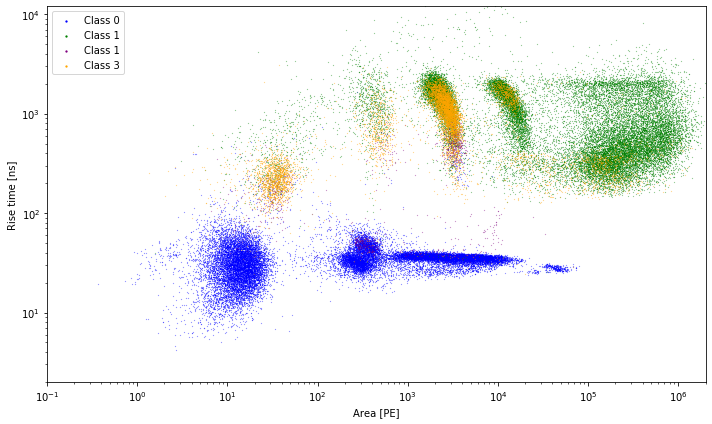

In [415]:
fig = plt.figure(figsize=(10,6))
plt.scatter(class0_v2['area'],class0_v2['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
plt.scatter(class1_v2['area'],class1_v2['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class3_v2['area'],class3_v2['rise_time'], s= 0.1, marker='.',color='purple', label = 'Class 1')
plt.scatter(class4_v2['area'],class4_v2['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

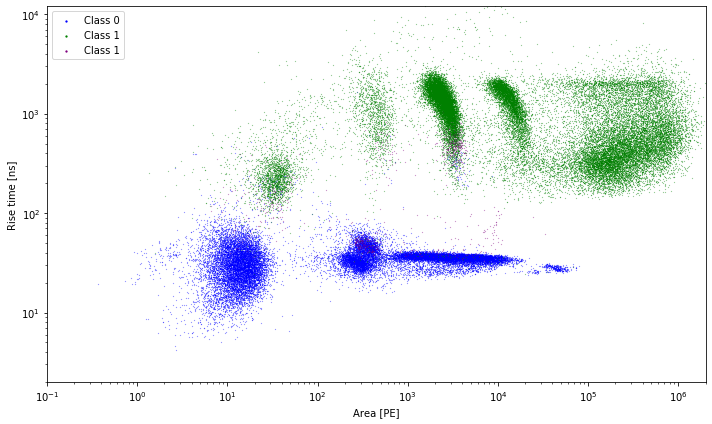

In [416]:
fig = plt.figure(figsize=(10,6))
plt.scatter(class0_v2['area'],class0_v2['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
plt.scatter(class1_v2['area'],class1_v2['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class3_v2['area'],class3_v2['rise_time'], s= 0.1, marker='.',color='purple', label = 'Class 1')
plt.scatter(class4_v2['area'],class4_v2['rise_time'], s= 0.1, marker='.',color='g')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

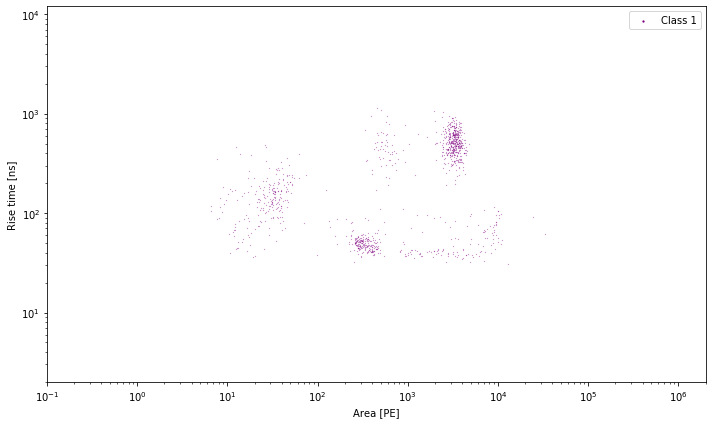

In [453]:
fig = plt.figure(figsize=(10,6))
#plt.scatter(class0_v2['area'],class0_v2['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
#plt.scatter(class1_v2['area'],class1_v2['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class3_v2['area'],class3_v2['rise_time'], s= 0.1, marker='.',color='purple', label = 'Class 1')
#plt.scatter(class4_v2['area'],class4_v2['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [42]:
img2 = Image.open('/home/luissanchez25/im_kr83recall_cc_30x30_5M.0.rmpmap.png')
imgGray2 = img.convert('L')
#imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')

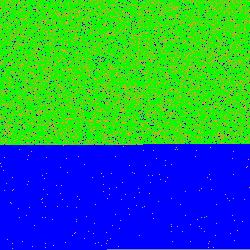

In [43]:
img2.show()

Would be interesting to upsample the data based on dt to examine this rise time vs area

In [460]:
def upsample_data(wfdata, max_dt):
    #this function takes in waveforms of different dts and upsamples them by repeating
    #the elements by the dt value and padding with zeros when necessary
    #Max dt is just the largest dt to use
    data = wfdata['data'].copy()
    dt = wfdata['dt'].copy() // 10 # Integer divide by 10 ns
    #max_dt = 8 # units of 10 ns
    assert dt.max() <= max_dt

    # This will be where the padded waveforms go
    S2_padded_data = np.zeros((data.shape[0],
                            data.shape[1]*max_dt))

    for value in np.unique(dt): 
        # Just pick waveforms with dt of some value, where this is the mask
        selection = dt == value

    # Fill required values in the padded data
        S2_padded_data[selection, 0:value*200] = np.repeat(data[selection],
                                                        value,
                                                        axis=1,)
    return S2_padded_data

In [64]:
def assign_labels(data, ref_img, xdim, ydim):
    '''This functions takes in the data and classifications based on an image gives the
    unique labels as well as the data set bacl with the new classification
    PS this version only takes in S1s and S2s and ignores unclassified samples, 
    another version will be made to deal with the unclassified samples
    
    data: can be either peaks or peak_basics
    ref_img: will be the image extracted from the SOM classification of each data point
    xdim: width of the image cube
    ydim: height of the image cube
    cut_out: removes the n last digits of the image vector if necesarry'''
    from PIL import Image
    img = Image.open(ref_img)
    imgGray = img.convert('L')
    #imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')
    img_color = np.array(img)
    img_color_2d = img_color.reshape((xdim*ydim,3))
    label = -1 * np.ones(img_color.shape[:-1])
    colorp = np.unique(img_color_2d, axis = 0)
    for i, color in enumerate(colorp):  # argwhere
        label[np.all((img_color == color), axis = 2)] = i
    label_vec = label.reshape((xdim*ydim))
    label_vec_nonzero = label_vec
    print("size of label vector is " + str(np.size(label_vec_nonzero)))
    s2_data = data[data['type'] == 2]
    s1_data = data[data['type'] == 1]
    som_class_peaks = np.concatenate((s1_data,s2_data)) #note had to reverse s2,s1 to s1,s2
    print("size of data vector is " + str(np.size(som_class_peaks)))
    som_class_peaks['type'] = label_vec_nonzero
    
    return colorp, som_class_peaks

In [54]:
data = np.concatenate((s2,s1))

In [70]:
[A, SOM_cls_kr83r] = assign_labels(data,'im_kr83recall_cc_30x30_5M.0.rmpmap.png', 250, 250, 143)

size of label vector is 62357
size of data vector is 62357


In [75]:
A

array([[  0,   0, 255],
       [  0, 255,   0],
       [127, 133, 182],
       [254, 146,  43]], dtype=uint8)

In [76]:
cls0_krR = SOM_cls_kr83r[SOM_cls_kr83r['type'] == 0]
cls1_krR = SOM_cls_kr83r[SOM_cls_kr83r['type'] == 1]
cls2_krR = SOM_cls_kr83r[SOM_cls_kr83r['type'] == 3]

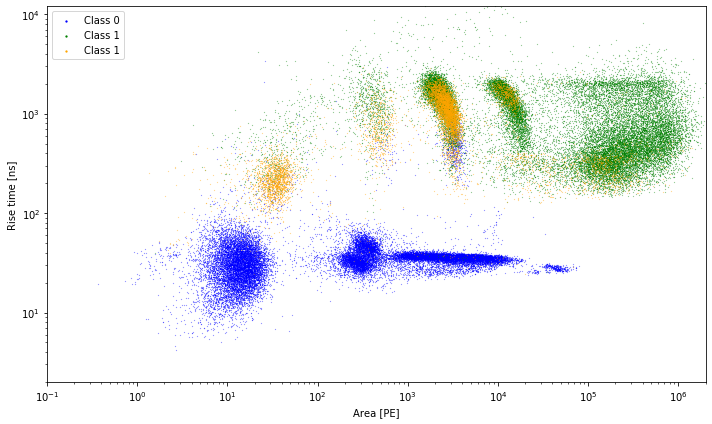

In [77]:
fig = plt.figure(figsize=(10,6))
plt.scatter(cls0_krR['area'],cls0_krR['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
plt.scatter(cls1_krR['area'],cls1_krR['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(cls2_krR['area'],cls2_krR['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 1') #purple
#plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [402]:
imgkr35x35 = Image.open('im_kr83_real_35x35.0.rmpmap.png')
imgGraykr35x35 = img.convert('L')

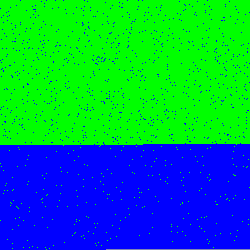

In [403]:
imgkr35x35.show()

In [404]:
[AA , kr35x35_wf_SOMlabls] = assign_labels(data,'im_kr83_real_35x35.0.rmpmap.png', 250, 250, 143)

In [405]:
AA

array([[  0,   0, 255],
       [  0, 255,   0],
       [127, 133, 182]], dtype=uint8)

In [406]:
cls0_krR_35 = kr35x35_wf_SOMlabls[kr35x35_wf_SOMlabls['type'] == 0]
cls1_krR_35 = kr35x35_wf_SOMlabls[kr35x35_wf_SOMlabls['type'] == 1]

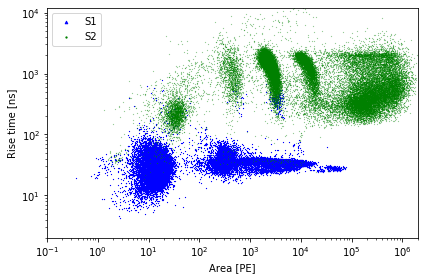

In [482]:
fig = plt.figure(figsize=(6,4))
plt.scatter(cls0_krR_35['area'],cls0_krR_35['rise_time'], s= .1, marker='^',color='b', label = 'S1')
plt.scatter(cls1_krR_35['area'],cls1_krR_35['rise_time'], s= .1, marker='.',color='g', label = 'S2')
#plt.scatter(cls2_krR['area'],cls2_krR['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 1') #purple
#plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [1]:
[C , kr35x35_ps_up_SOMlbls] = assign_labels(data,'im_kr83real_up_ps_L1.0.rmpmap.png', 250, 250, 143)

NameError: name 'assign_labels' is not defined

In [72]:
[CC , kr35x35_upps_SOMlbls] = assign_labels(krRpb[krRpb['dt'] <= 80],'im_kr83real_up_ps_L1.0.rmpmap.png', 224, 276)

size of label vector is 61824
size of data vector is 61824


In [75]:
S1real_kr_uppsL1 = kr35x35_upps_SOMlbls[kr35x35_upps_SOMlbls['type'] == 1]
S2real_kr_uppsL1 = kr35x35_upps_SOMlbls[kr35x35_upps_SOMlbls['type'] == 0]

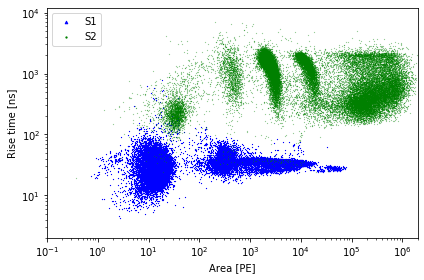

In [483]:
fig = plt.figure(figsize=(6,4))
plt.scatter(S1real_kr_uppsL1['area'],S1real_kr_uppsL1['rise_time'], s= 0.1, marker='^',color='b', label = 'S1')
plt.scatter(S2real_kr_uppsL1['area'],S2real_kr_uppsL1['rise_time'], s= 0.1, marker='.',color='g', label = 'S2')
#plt.scatter(cls2_krR['area'],cls2_krR['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 1') #purple
#plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [392]:
[G , krcal35x35_decile_SOMlbls] = assign_labels(data,'im_kr83cal_decile.0.rmpmap.png', 250, 250, 143)

In [394]:
G

array([[  0,   0, 255],
       [  0, 255,   0],
       [127, 133, 182]], dtype=uint8)

In [397]:
S1real_kr_decile = krcal35x35_decile_SOMlbls[krcal35x35_decile_SOMlbls['type'] == 1]
S2real_kr_decile = krcal35x35_decile_SOMlbls[krcal35x35_decile_SOMlbls['type'] == 2]

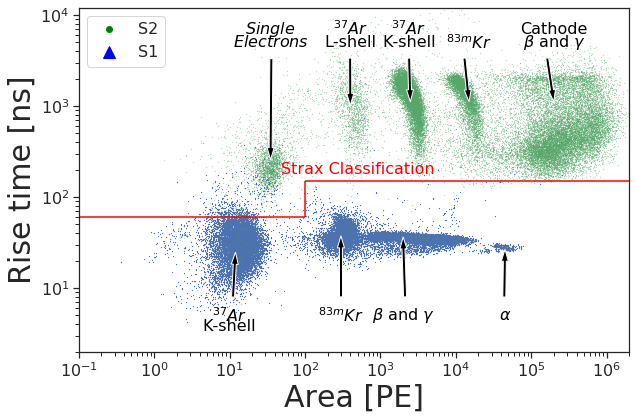

In [1200]:
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(S1real_kr_decile['area'],S1real_kr_decile['rise_time'], s= 0.1, marker='^',color='b', label = 'S1')
plt.scatter(S2real_kr_decile['area'],S2real_kr_decile['rise_time'], s= 0.1, marker='.',color='g', label = 'S2')
#plt.scatter(cls2_krR['area'],cls2_krR['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 1') #purple
#plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')

fz = 16
wd = 3
### S2 annotations ###
#single electrons
ax.annotate(' ',xy=(35, 250),  xycoords='data',
            xytext=(0.35, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(35, 7000, r"$Single$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(35, 5000, r"$Electrons$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Ar37 L shell
ax.annotate(' ',xy=(400, 1000),  xycoords='data',
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(400, 7000, r"$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(400, 5000, r"L-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Ar37 Kshell
ax.annotate(' ',xy=(2500, 1100),  xycoords='data',
            xytext=(0.6, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(2400, 7000, r"$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(2400, 5000, r"K-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Kr83
ax.annotate(' ',xy=(15000, 1100),  xycoords='data',
            xytext=(0.7, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(15000, 5000, r"$^{83m}Kr$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})

#Betas and gammas
ax.annotate(' ',xy=(200000, 1100),  xycoords='data',
            xytext=(0.85, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(200000, 7000, r"Cathode",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(200000, 5000, r"$\beta$" + " and " r"$\gamma$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})


### S1 signals ###
#Ar77 K shell
ax.annotate(' ',xy=(12, 25),  xycoords='data',
            xytext=(0.28, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(10, 5, r"$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
plt.text(10, 3.8, r"K-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#kr83
ax.annotate(' ',xy=(300, 38),  xycoords='data',
            xytext=(0.48, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(300, 5, r"$^{83m}Kr$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#beta and gamma
ax.annotate(' ',xy=(2000, 37),  xycoords='data',
            xytext=(0.6, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(2000, 5, r"$\beta$" + " and " + r"$\gamma$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#alpha
ax.annotate(' ',xy=(45000, 27),  xycoords='data',
            xytext=(0.78, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
plt.text(45000, 5, r"$\alpha$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="None", fc="white", ec="black", pad=0.2)})
#plt.text(300, 3.8, r"K-shell",
#         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})

          #'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
#r"|\nabla\phi| &=& 1,\\" + \
#      r"\frac{\partial \phi}{\partial t} + U|\nabla \phi| &=& 0 " + \

#draw strax decision boundary
ax.hlines(60, 0, 100, color = 'red')
ax.vlines(100, 60, 150, color = 'red')
ax.hlines(150, 100, 2e6, 'red')

plt.text(500, 200, "Strax Classification",
        {'color': 'red', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

legend_elements = [Line2D([0], [0], marker='.', 
                          color='green', label='S2',
                          markerfacecolor='green',linewidth=0, 
                          markersize=12),
                   Line2D([0], [0], marker='^', 
                          color='blue', label='S1',
                          markerfacecolor='blue',linewidth=0, 
                          markersize=12)]
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.xlabel('Area [PE]', fontsize = 30)
plt.ylabel('Rise time [ns]', fontsize = 30)
plt.legend(handles = legend_elements , loc = "upper left", fontsize = 16)#, fontsize = 24)
plt.tight_layout()
plt.savefig('Qual_img_pc/kr83_cal_data_labels_SOMcls_straxBoundaryv2.pdf')
plt.show()

In [78]:
matched_peak_basics = np.load('kr83_sim_runid101_matched_peak_basics.npy')
matched_peaks = np.load('kr83_sim_runid101_matched_peaks.npy')
matched_truth = np.load('kr83_sim_runid101_matched_truth.npy')

In [79]:
kr83sim_gts1 = matched_truth[matched_truth['type'] == 1]
kr83sim_gts2 = matched_truth[matched_truth['type'] == 2]

In [80]:
kr83sim_gt = np.concatenate((kr83sim_gts1,kr83sim_gts2))

In [112]:
kr83sim_gt_r = np.concatenate((kr83sim_gts2,kr83sim_gts1))

In [81]:
np.size(kr83sim_gts1)

58122

In [82]:
np.size(kr83sim_gts2)

37324

In [83]:
imgkr = Image.open('/home/luissanchez25/im_kr83realSOM_kr83simmap.0.rmpmap.png')
imgGraykr = img.convert('L')
#imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')

In [84]:
img_colorkr = np.array(imgkr)
img_color_2d_kr = img_colorkr.reshape((309*309,3))

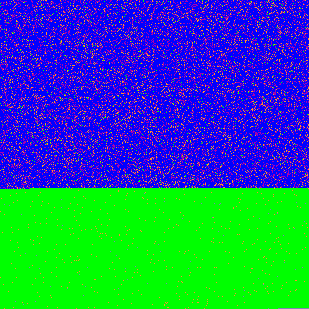

In [85]:
imgkr.show()

In [86]:
labelkr = -1 * np.ones(img_colorkr.shape[:-1])
colorkr = np.unique(img_color_2d_kr, axis = 0)
for i, color in enumerate(colorkr):  # argwhere
    labelkr[np.all((img_colorkr == color), axis = 2)] = i
label_veckr = labelkr.reshape((309*309))
label_vec_nonzerokr = label_veckr[:-35]

In [87]:
colorkr

array([[  0,   0, 255],
       [  0, 255,   0],
       [127, 133, 182],
       [164,   0, 175],
       [254, 146,  43]], dtype=uint8)

In [88]:
#need to match truth values to matched peaks
matched_pb_t = matched_peak_basics
matched_pb_t['type'] = matched_truth['type']

Comparing simulated data to callibration data

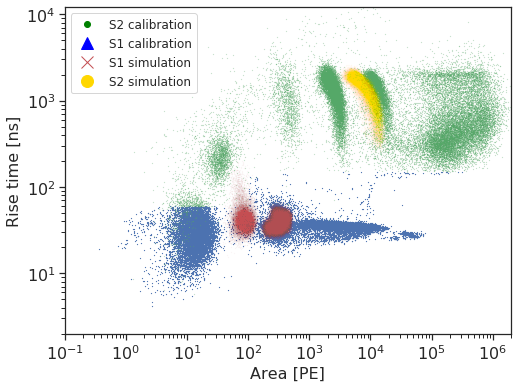

In [1204]:
fig = plt.figure(figsize=(8,6))
plt.tick_params(axis='both',labelsize=16)
plt.scatter(s1_tr['area'],s1['rise_time'], s= .1, marker='^',color='b',label='S1 callibration', alpha = 0.95)
plt.scatter(s2_tr['area'],s2['rise_time'], s= .1, marker='.',color='g',label='S2 callibration', alpha = 0.8)
plt.scatter(s1_kr83sim['area'],s1_kr83sim['rise_time'], s= .1, marker='x',color='r',label='S1 simulation', alpha = 0.05)
plt.scatter(s2_kr83sim['area'],s2_kr83sim['rise_time'], s= .1, marker='o',color='gold',label='S2 simulation', alpha = 0.05)
#plt.scatter(s['area'],s['rise_time'], s= 1, marker='.',color='k',label='Unknown')

legend_elements = [Line2D([0], [0], marker='.', 
                          color='green', label='S2 calibration',
                          markerfacecolor='green',linewidth=0, 
                          markersize=12),
                   Line2D([0], [0], marker='^', 
                          color='blue', label='S1 calibration',
                          markerfacecolor='blue',linewidth=0, 
                          markersize=12),
                  Line2D([0], [0], marker='x', 
                          color='r', label='S1 simulation',
                          markerfacecolor='r',linewidth=0, 
                          markersize=12),
                  Line2D([0], [0], marker='o', 
                          color='gold', label='S2 simulation',
                          markerfacecolor='gold',linewidth=0, 
                          markersize=12)]
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]',size=16)
plt.ylabel('Rise time [ns]',size=16)
plt.legend(handles = legend_elements , loc = "upper left", fontsize = 12)#, fontsize = 24)
plt.savefig('./Qual_img_pc/kr83_cal_vs_simv2.pdf')
#plt.legend(prop={'size':12})
plt.show()

In [915]:
s1_tr_pos = s1_tr[s1_tr['area'] >= 0]

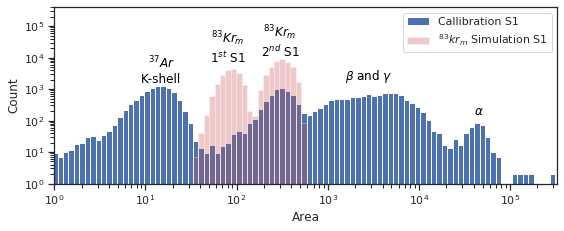

In [1335]:
fig = plt.figure(figsize=(8,6))
#plt.subplot(211)
fz = 12

hist, bins, _ = plt.hist(s1_tr_pos['area'], bins=100)

plt.subplot(212)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.subplot(212)
plt.hist(s1_tr_pos['area'], bins=logbins, label = 'Callibration S1')#, histtype='step')
plt.hist(s1_kr83sim['area'], bins=logbins, color = 'r', 
         label = "$^{83}kr_m$ Simulation S1", alpha = 0.3) #histtype='step'

# Here we will place information regarding what each peak is
#argon 37
plt.text(15, 7e3, "$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.text(15, 2e3, "K-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#kr83
plt.text(80, 4e4, "$^{83}Kr_{m}$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.text(80, 1e4, "$1^{st}$ S1",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

plt.text(300, 6e4, "$^{83}Kr_{m}$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.text(300, 1.5e4, "$2^{nd}$ S1",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Betas and gamma
plt.text(2800, 2.5e3, r"$\beta$ and $\gamma$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#alpha
plt.text(45000, 200, r"$\alpha$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

plt.xlim(1)
plt.ylim(1,4e5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Area")
plt.ylabel("Count")
plt.legend(fontsize = 11)
plt.tight_layout()
plt.savefig("./Qual_img_pc/S1_cal_vs_simv2.pdf",bbox_inches='tight')
plt.show()

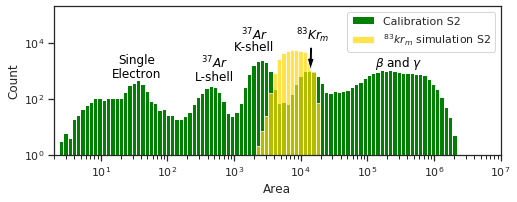

In [1338]:
fig = plt.figure(figsize=(8,6))
#plt.subplot(211)
fz = 12
hist, bins, _ = plt.hist(s2_tr['area'], bins=100)

plt.subplot(212)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.subplot(212)
plt.hist(s2_tr['area'], bins=logbins, color = 'green', label = "Calibration S2")
plt.hist(s2_kr83sim['area'], bins=logbins, color = 'gold', label = "$^{83}kr_m$ simulation S2", alpha = 0.7)

#single electron
plt.text(35, 2.5e3, "Single",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.text(35, 0.8e3, "Electron",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Ar L shell
plt.text(500, 2e3, "$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.text(500, 0.6e3, "L-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Ar K shell
plt.text(2000, 2e4, "$^{37}Ar$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.text(2000, 0.7e4, "K-shell",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})

#Kr83 s2
plt.text(15000, 2e4, "$^{83}Kr_m$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})
plt.annotate(' ',xy=(14000, 1e3),  xycoords='data',
            xytext=(0.58, 0.83), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width = wd, headwidth = 7),
            horizontalalignment='right', verticalalignment='top'
            )
#betas and gammas
plt.text(300000, 2e3, r"$\beta$ and $\gamma$",
         {'color': 'black', 'fontsize': fz, 'ha': 'center', 'va': 'center'})


plt.xlim(2, 1e7)
plt.ylim(1,2e5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Area")
plt.ylabel("Count")
plt.legend(loc = "upper right")
plt.savefig("./Qual_img_pc/S2_cal_vs_simv2.pdf", bbox_inches='tight')
plt.show()

Examining Kr83 s1/s2 classification of simulated data with the SOM trained on calibration data

In [343]:
s2_kr83sim = matched_pb_t[matched_pb_t['type'] == 2]
s1_kr83sim = matched_pb_t[matched_pb_t['type'] == 1]
som_class_peaks_krsim = np.concatenate((s1_kr83sim,s2_kr83sim)) #note had to reverse s2,s1 to s1,s2
s2s1_kr83simgt = np.concatenate((s2_kr83sim,s1_kr83sim)) 
#som_class_peaks_krsim['type'] = label_vec_nonzerokr

In [449]:
class0_kr = som_class_peaks_krsim[som_class_peaks_krsim['type'] == 0]
class1_kr = som_class_peaks_krsim[som_class_peaks_krsim['type'] == 1]
class2_kr = som_class_peaks_krsim[som_class_peaks_krsim['type'] == 2]
class3_kr = som_class_peaks_krsim[som_class_peaks_krsim['type'] == 3]
class4_kr = som_class_peaks_krsim[som_class_peaks_krsim['type'] == 4]

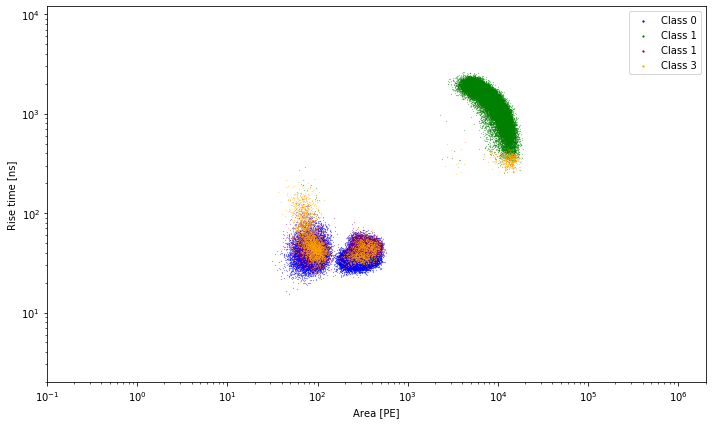

In [459]:
fig = plt.figure(figsize=(10,6))
plt.scatter(class0_kr['area'],class0_kr['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
plt.scatter(class1_kr['area'],class1_kr['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class3_kr['area'],class3_kr['rise_time'], s= 0.1, marker='.',color='purple', label = 'Class 1') #purple
plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [27]:
def assign_labels(data, ref_img, xdim, ydim, cut_out):
    '''This functions takes in the data and classifications based on an image gives the
    unique labels as well as the data set bacl with the new classification
    PS this version only takes in S1s and S2s and ignores unclassified samples, 
    another version will be made to deal with the unclassified samples
    
    data: can be either peaks or peak_basics
    ref_img: will be the image extracted from the SOM classification of each data point
    xdim: width of the image cube
    ydim: height of the image cube
    cut_out: removes the n last digits of the image vector if necesarry'''
    from PIL import Image
    img = Image.open(ref_img)
    imgGray = img.convert('L')
    #imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')
    img_color = np.array(img)
    img_color_2d = img_color.reshape((xdim*ydim,3))
    label = -1 * np.ones(img_color.shape[:-1])
    colorp = np.unique(img_color_2d, axis = 0)
    for i, color in enumerate(colorp):  # argwhere
        label[np.all((img_color == color), axis = 2)] = i
    label_vec = label.reshape((xdim*ydim))
    label_vec_nonzero = label_vec[:-cut_out]
    print("size of label vector is " + str(np.size(label_vec_nonzero)))
    s2_data = data[data['type'] == 2]
    s1_data = data[data['type'] == 1]
    som_class_peaks = np.concatenate((s1_data,s2_data)) #note had to reverse s2,s1 to s1,s2
    print("size of data vector is " + str(np.size(som_class_peaks)))
    som_class_peaks['type'] = label_vec_nonzero
    
    return colorp, som_class_peaks

In [116]:
[C , krsim30x30_wf_SOMlbls] = assign_labels(som_class_peaks_krsim,'im_kr83sim_30x30_5M_v2.0.rmpmap.png', 309, 309, 35)

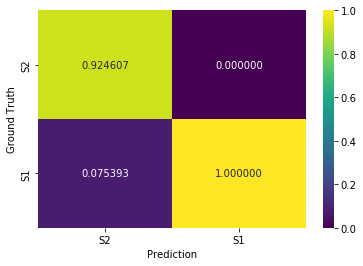

In [459]:
plot2(krsim30x30_wf_SOMlbls['type']+1,kr83sim_gt['type'])

In [121]:
count = 0
for i in np.arange(np.size(kr83sim_gt['type'])):
    if kr83sim_gt['type'][i] == (krsim30x30_wf_SOMlbls['type'][i]+1):
        count = count + 1

count/np.size(kr83sim_gt['type'])

0.9540892232256983

In [465]:
[B , krsim35x35_wf_SOMlabls] = assign_labels(som_class_peaks_krsim,'im_kr83sim_35x35.0.rmpmap.png', 309, 309, 35)

In [265]:
krtfx = np.array(som_class_peaks_krsim)
krtfx['type'] = np.array(krsim35x35_wf_SOMlabls['type'])

In [466]:
cls0_krsim = krsim35x35_wf_SOMlabls[krsim35x35_wf_SOMlabls['type'] == 0]
cls1_krsim = krsim35x35_wf_SOMlabls[krsim35x35_wf_SOMlabls['type'] == 1]

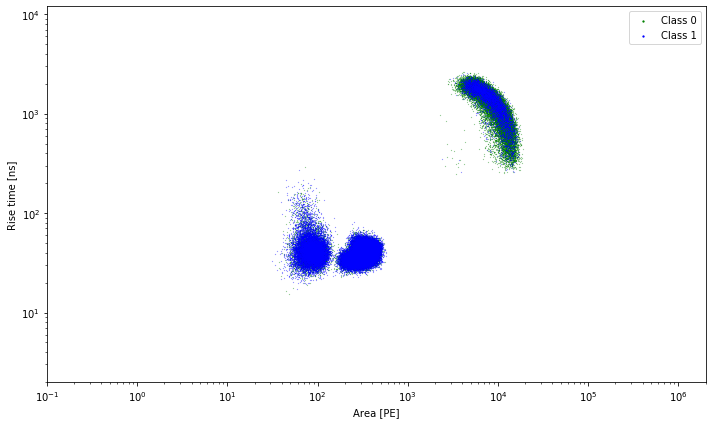

In [472]:
fig = plt.figure(figsize=(10,6))
plt.scatter(cls0_krsim['area'],cls0_krsim['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 0')
plt.scatter(cls1_krsim['area'],cls1_krsim['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 1')
#plt.scatter(class3_kr['area'],class3_kr['rise_time'], s= 0.1, marker='.',color='purple', label = 'Class 1') #purple
#plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='orange', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

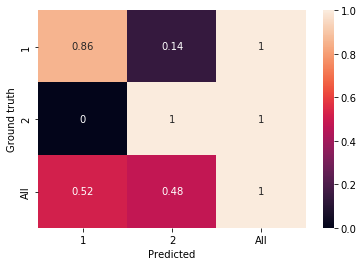

In [468]:
generate_confusion_mat(krsim35x35_wf_SOMlabls['type']+1,kr83sim_gt['type'],2)

Text(0, 0.5, 'Predicted Class')

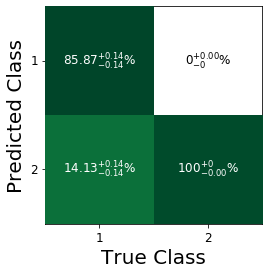

In [471]:
true_types = kr83sim_gt['type']
classified_types = krsim35x35_wf_SOMlabls['type']+1
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ['%d' % (t) for t in classes]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(4,4), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=20)
ax.set_ylabel('Predicted Class', fontsize=20)

In [122]:
count = 0
for i in np.arange(np.size(kr83sim_gt['type'])):
    if kr83sim_gt['type'][i] == (krsim35x35_wf_SOMlabls['type'][i]+1):
        count = count + 1

count/np.size(kr83sim_gt['type'])

0.7603985499654254

In [124]:
[Bx , krsim35x35_v2_SOMlbls] = assign_labels(som_class_peaks_krsim,'im_v2_kr83_35x35.0.rmpmap.png', 309, 309, 35)

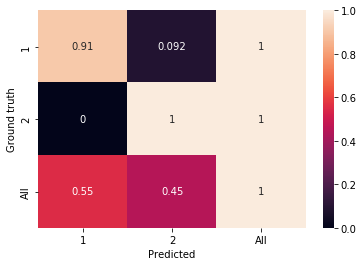

In [125]:
generate_confusion_mat(krsim35x35_v2_SOMlbls['type']+1,kr83sim_gt['type'],2)

In [126]:
count = 0
for i in np.arange(np.size(kr83sim_gt['type'])):
    if kr83sim_gt['type'][i] == (krsim35x35_v2_SOMlbls['type'][i]+1):
        count = count + 1

count/np.size(kr83sim_gt['type'])

0.9440626113194895

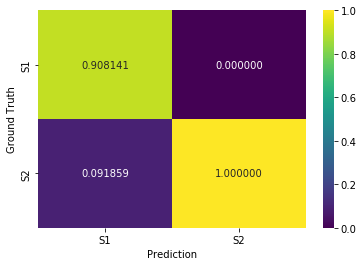

In [279]:
plot2(krsim35x35_v2_SOMlbls['type']+1,kr83sim_gt['type'])

Text(0, 0.5, 'Predicted Class')

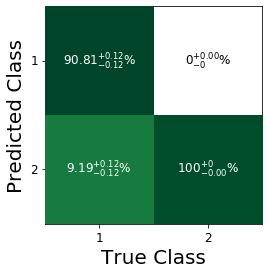

In [473]:
true_types = kr83sim_gt['type']
classified_types = krsim35x35_v2_SOMlbls['type']+1
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ['%d' % (t) for t in classes]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(4,4), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=20)
ax.set_ylabel('Predicted Class', fontsize=20)

In [333]:
[Z , krsim_decile_SOMlbls] = assign_labels(som_class_peaks_krsim,'im_kr83_sim_decile.0.rmpmap.png', 309, 309, 35)

In [334]:
import numpy as np
from scipy.stats import beta

def calculate_confusion_matrix(true_types, classified_types, with_binomial_errors=True):
    """
    Calculates a confusion matrix and optional
    binomial errors given the true types
    and classified types for a data set.
	
	Parameters
	----------
	true_types : array of ints, shape (number of entries in data set)
    The ground truth type for each entry in data set.
    
    classified_types : array of ints, shape (number of entries in data set)
    The classified type for each entry in data set.
    
    with_binomial_errors : bool, default is True
    If true, calculate binomial errors for each
    value in the confusion matrix.
    
	Returns
	-------
	confusion_matrix : array of ints, shape (number of classes, number of classes)
    Number of entries in data set of each true 
    type / classified type.
    
    confidence_interval : array of floats, shape (number of classes, number of classes, 2) 
    The binomial proportion confidence interval 
    for each entry in the confusion matrix.
    
    """
    classes = np.unique(true_types)
    num_classes = classes.shape[0]
    
    confusion_matrix = np.zeros((num_classes,num_classes), dtype=int)
    for i, t in enumerate(classes):
        true_t = true_types == t
        
        for j, c in enumerate(classes):
            class_c = classified_types == c
            confusion_matrix[j,i] = np.sum(class_c & true_t)
    
    if with_binomial_errors:
        
        confidence_interval = np.zeros((num_classes,num_classes,2))
        
        for i in range(num_classes):
            all_trials = np.sum(confusion_matrix[:,i])
            
            for j in range(num_classes):
                successes = confusion_matrix[j,i]
                interval = beta.interval(0.68, successes+0.5, all_trials-successes+0.5, loc=0, scale=all_trials)
                
                if confusion_matrix[j,i] >= 1:
                    confidence_interval[j,i,:] = [interval[1]-confusion_matrix[j,i], confusion_matrix[j,i]-interval[0]]
                else:
                    confidence_interval[j,i,:] = [interval[1]-confusion_matrix[j,i], 0]
        
        return confusion_matrix, confidence_interval
    
    else:
        
        return confusion_matrix

In [339]:
krsim_decile_SOMlbls['type'] = krsim_decile_SOMlbls['type']+1

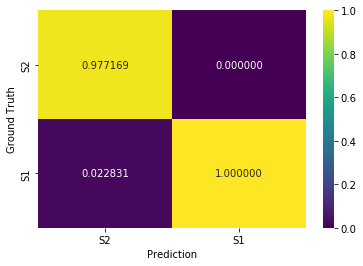

In [474]:
plot2(krsim_decile_SOMlbls['type'],s2s1_kr83simgt['type'])

Text(0, 0.5, 'Predicted Class')

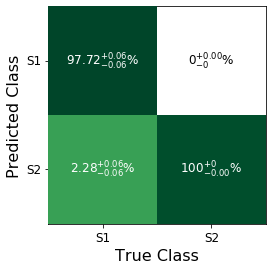

In [685]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

true_types = s2s1_kr83simgt['type']
classified_types = krsim_decile_SOMlbls['type']
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ["S1","S2"]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(4,4), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=16)
ax.set_ylabel('Predicted Class', fontsize=16)

Text(0, 0.5, 'Predicted Class')

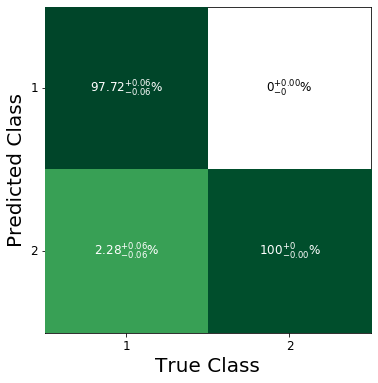

In [409]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

true_types = s2s1_kr83simgt['type']
classified_types = krsim_decile_SOMlbls['type']
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ['%d' % (t) for t in classes]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(6,6), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=20)
ax.set_ylabel('Predicted Class', fontsize=20)

In [441]:
ff = get_results(s2s1_kr83simgt['type'],
            krsim_decile_SOMlbls['type'], 
            ind_test=np.arange(np.size(s2s1_kr83simgt['type'])), 
            d=s2s1_kr83simgt)

In [442]:
ff['true_s1']['area']

array([340.9265  , 258.30038 ,  65.225006, ..., 303.36386 ,  98.48579 ,
       401.44623 ], dtype=float32)

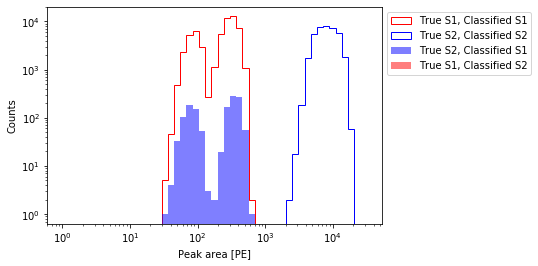

In [443]:
plot_result_hist(ff)

In [421]:
res = dict()
res['true_s1'] = [np.logical_and(s2s1_kr83simgt['type']==1, krsim_decile_SOMlbls['type']==1)]

In [411]:

def get_cm(y_true, y_pred):
    '''
    Put it in Tina's format. 
    Stupid mistake on my part. 
    '''
    return confusion_matrix(y_true, y_pred).T

### Evaluation
def plot_result_hist(result, 
                     bins = np.logspace(0,4.5,50), 
                     keytoplot = 'area', 
                     xlab = 'Peak area [PE]',                     
                  ):
    plt.hist(result['true_s1'][keytoplot], bins=bins, histtype='step', color='r', label='True S1, Classified S1')
    plt.hist(result['true_s2'][keytoplot], bins=bins, histtype='step', color='b', label='True S2, Classified S2')
    plt.hist(result['false_s1'][keytoplot], bins=bins, color='b', label='True S2, Classified S1', alpha=0.5)
    plt.hist(result['false_s2'][keytoplot], bins=bins, color='r', label='True S1, Classified S2', alpha=0.5)

    plt.xlabel(xlab)
    plt.ylabel('Counts')
    plt.legend(bbox_to_anchor=[1,1])
    plt.loglog()
    
def get_results(test_out, y_test=None, ind_test=None, d=None):
    res = dict()
    res['true_s1'] = d[ind_test][np.logical_and(y_test==0, test_out==0)]
    res['true_s2'] = d[ind_test][np.logical_and(y_test==1, test_out==1)]
    res['false_s1'] = d[ind_test][np.logical_and(y_test==1, test_out==0)]
    res['false_s2'] = d[ind_test][np.logical_and(y_test==0, test_out==1)]
    res['test_s1'] = d[ind_test][y_test==0]
    res['test_s2'] = d[ind_test][y_test==1]
    return res

make histograms based on the energies for the S1s in both simulation and real data

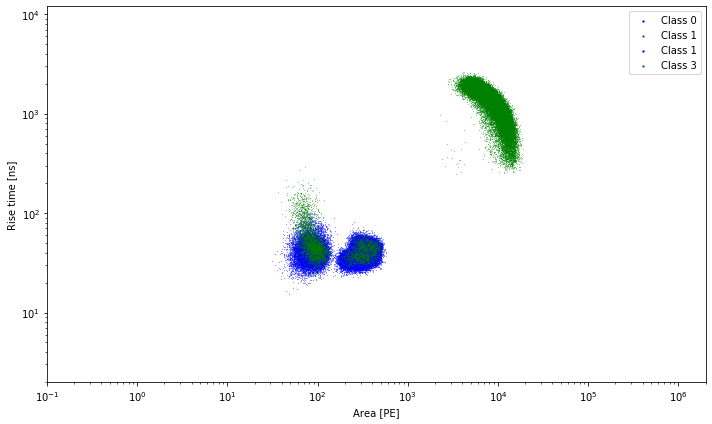

In [495]:
fig = plt.figure(figsize=(10,6))
plt.scatter(class0_kr['area'],class0_kr['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
plt.scatter(class1_kr['area'],class1_kr['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class3_kr['area'],class3_kr['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 1') #purple
plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [506]:
SOM_binary_class = som_class_peaks_krsim

SOM_binary_class['type'] = np.where(som_class_peaks_krsim['type'] == 3,
                                    0,
                                    som_class_peaks_krsim['type'])
SOM_binary_class['type'] = np.where(som_class_peaks_krsim['type'] == 4,
                                    1,
                                    som_class_peaks_krsim['type'])

In [38]:
def generate_confusion_mat(predicted,truth,num_cls):
    import pandas as pd
    import seaborn as sn
    import matplotlib.pyplot as plt

    data = {'y_Actual':    truth,
            'y_Predicted': predicted
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    #df = pd.DataFrame(data, columns=['y_Predicted','y_Actual'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Ground truth'], colnames=['Predicted'], margins = True)
    #confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames=['Ground truth'], colnames=['Predicted'], margins = True)
    a = confusion_matrix
    aa = np.array(a)
    v = aa[:,num_cls]
    confusion_matrix = confusion_matrix / v[:,None]

    sn.heatmap(confusion_matrix, annot=True)
    #plt.savefig('Qual_imgs/kr83_confusion_mat_SOM.png')
    plt.show()

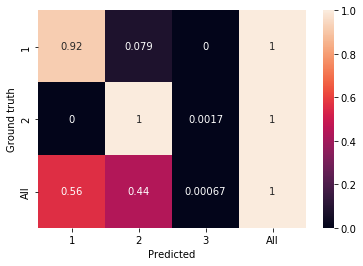

In [513]:
generate_confusion_mat(SOM_binary_class['type']+1,kr83sim_gt['type'])

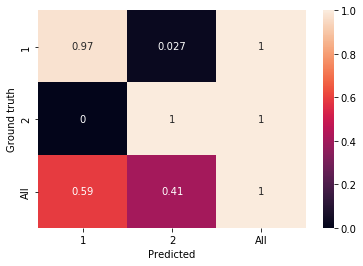

In [475]:
generate_confusion_mat(matched_peaks['type'],matched_truth['type'],2)

Text(0, 0.5, 'Predicted Class')

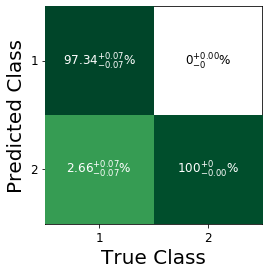

In [476]:
true_types = matched_truth['type']
classified_types = matched_peaks['type']
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ['%d' % (t) for t in classes]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(4,4), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=20)
ax.set_ylabel('Predicted Class', fontsize=20)

Text(0, 0.5, 'Predicted Class')

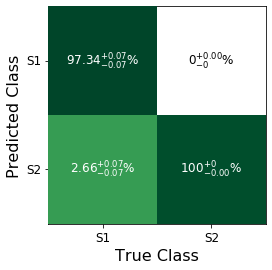

In [684]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

true_types = matched_truth['type']
classified_types = matched_peaks['type']
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ["S1", "S2"]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(4,4), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=16)
ax.set_ylabel('Predicted Class', fontsize=16)

In [127]:
count = 0
for i in np.arange(np.size(matched_truth['type'])):
    if matched_truth['type'][i] == (matched_peaks['type'][i]):
        count = count + 1

count/np.size(matched_truth['type'])

0.9837918823208935

Exception in thread load:records:
Traceback (most recent call last):
  File "/opt/conda/envs/didacts/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/opt/conda/envs/didacts/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/envs/didacts/lib/python3.8/site-packages/strax/mailbox.py", line 262, in _send_from
    self.kill_from_exception(e)
  File "/opt/conda/envs/didacts/lib/python3.8/site-packages/strax/mailbox.py", line 186, in kill_from_exception
    raise e
  File "/opt/conda/envs/didacts/lib/python3.8/site-packages/strax/mailbox.py", line 249, in _send_from
    raise MailboxReadTimeout(
strax.mailbox.MailboxReadTimeout: <Mailbox: records_mailbox> could not progress beyond 211, no driving subscriber requested it.


In [517]:
np.unique(matched_truth['type'])

array([1, 2], dtype=int8)

In [242]:
def plot3(true,predicted):
    import pandas as pd
    columns=['S2','S1']
    indecies = ['S2', 'S1', 'Unknown']
    table = pd.DataFrame(confusion_matrix(true, predicted)/np.sum(confusion_matrix,axis = 0),
                         columns = columns, index = indecies)
    sns.heatmap(table, annot = True, fmt = 'f', cmap = 'viridis')
    plt.ylabel('Ground Truth')
    plt.xlabel('Prediction')
    plt.show()

In [258]:
def plot2(true,predicted):
    import pandas as pd
    columns=['S2','S1']
    indecies = ['S2', 'S1']
    table = pd.DataFrame(confusion_matrix(true, predicted)/np.sum(confusion_matrix(true, predicted),axis = 0),
                         columns = columns, index = indecies)
    sns.heatmap(table, annot = True, fmt = 'f', cmap = 'viridis')
    plt.ylabel('Ground Truth')
    plt.xlabel('Prediction')
    plt.show()

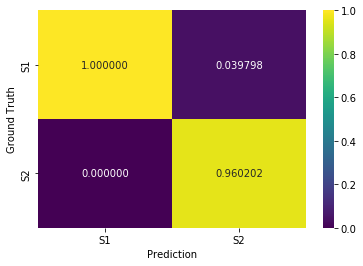

In [261]:
from sklearn.metrics import confusion_matrix
plot2(matched_truth['type'],matched_peaks['type'])

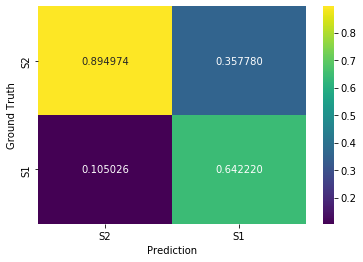

In [454]:
plot2(kr83sim_gt['type'],krsim35x35_wf_SOMlabls['type']+1)

In [456]:
def assign_labels(data, ref_img, xdim, ydim, cut_out):
    '''This functions takes in the data and classifications based on an image gives the
    unique labels as well as the data set bacl with the new classification
    PS this version only takes in S1s and S2s and ignores unclassified samples, 
    another version will be made to deal with the unclassified samples
    
    data: can be either peaks or peak_basics
    ref_img: will be the image extracted from the SOM classification of each data point
    xdim: width of the image cube
    ydim: height of the image cube
    cut_out: removes the n last digits of the image vector if necesarry'''
    img = Image.open(ref_img)
    imgGray = img.convert('L')
    #imgGray2.save('/home/luissanchez25/im_kr83_real__30x30_2lbl.0.rmpmap.png')
    img_color = np.array(img)
    img_color_2d = img_color.reshape((xdim*ydim,3))
    label = -1 * np.ones(img_color.shape[:-1])
    colorp = np.unique(img_color_2d, axis = 0)
    for i, color in enumerate(colorp):  # argwhere
        label[np.all((img_color == color), axis = 2)] = i
    label_vec = label.reshape((xdim*ydim))
    label_vec_nonzero = label_vec[:-cut_out]
    s2_data = data[data['type'] == 2]
    s1_data = data[data['type'] == 1]
    som_class_peaks = np.concatenate((s1_data,s2_data)) #note had to reverse s2,s1 to s1,s2
    som_class_peaks['type'] = label_vec_nonzero
    
    return colorp, som_class_peaks

In [474]:
[colors_kr, SOMcls_Argon] = assign_labels(kr83_peaks_clean, 
                                          '/home/luissanchez25/im_kr83_real_30x30_4lbl.0.rmpmap.png',
                                         250,
                                         250,
                                         143)

In [ ]:
pupl_lbl = SOMcls_Argon[SOMcls_Argon['type']==3]
purpl_lbl_dt80 = pupl_lbl[pupl_lbl['dt']<=80]

In [490]:
purple_label_upampled = upsample_data(purpl_lbl_dt80,8)

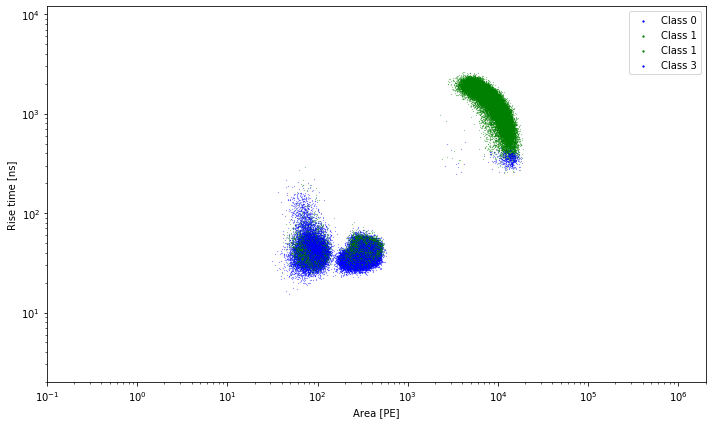

In [455]:
fig = plt.figure(figsize=(10,6))
plt.scatter(class0_kr['area'],class0_kr['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 0')
plt.scatter(class1_kr['area'],class1_kr['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class3_kr['area'],class3_kr['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [108]:
[CC , krsim35x35_wf_upps_SOMlbls] = assign_labels(som_class_peaks_krsim,'im_kr83_sim_up_ps_L1.0.rmpmap.png', 309, 309, 35)

In [96]:
cls0_krsim_upps = krsim35x35_wf_upps_SOMlbls[krsim35x35_wf_upps_SOMlbls['type'] == 0]
cls1_krsim_upps = krsim35x35_wf_upps_SOMlbls[krsim35x35_wf_upps_SOMlbls['type'] == 1]

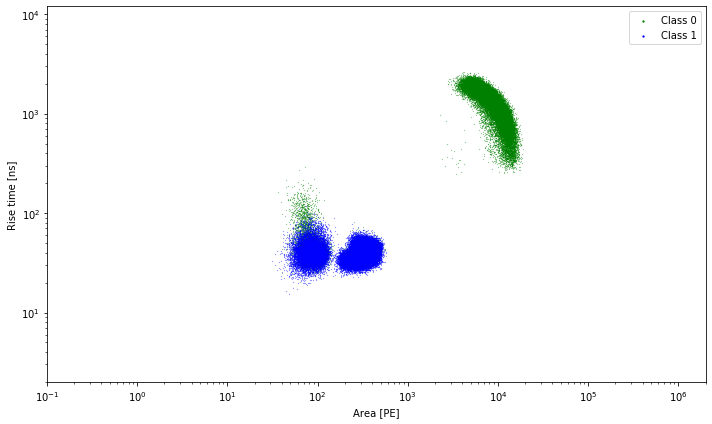

In [98]:
fig = plt.figure(figsize=(10,6))
plt.scatter(cls0_krsim_upps['area'],cls0_krsim_upps['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 0')
plt.scatter(cls1_krsim_upps['area'],cls1_krsim_upps['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 1')
#plt.scatter(class3_kr['area'],class3_kr['rise_time'], s= 0.1, marker='.',color='g', label = 'Class 1')
#plt.scatter(class4_kr['area'],class4_kr['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 3')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [109]:
krsim35x35_wf_upps_SOMlbls['type'] = np.where(krsim35x35_wf_upps_SOMlbls['type'] == 0,2,krsim35x35_wf_upps_SOMlbls['type'])

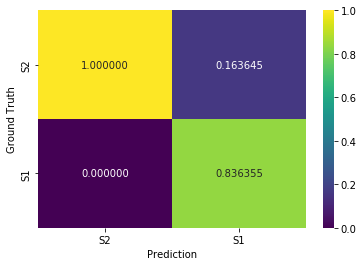

<Figure size 432x288 with 0 Axes>

In [457]:
plot2(kr83sim_gt_r['type'],krsim35x35_wf_upps_SOMlbls['type'])
plt.savefig('cf_krsim35x35_upps_SOMlbls.png')

Text(0, 0.5, 'Predicted Class')

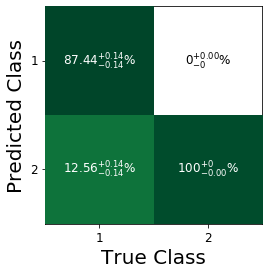

In [458]:
true_types = kr83sim_gt_r['type']
classified_types = krsim35x35_wf_upps_SOMlbls['type']
matrix, conf_interval = calculate_confusion_matrix(true_types, classified_types)
classes = np.unique(true_types)
num_classes = classes.shape[0]
class_names = ['%d' % (t) for t in classes]
fontsize_choice = 12

###
# Make Plot
###

fig, ax = plt.subplots(figsize=(4,4), facecolor='white')

im = ax.imshow(matrix, norm=LogNorm(vmin=1.0, vmax=np.max(matrix)), cmap="YlGn", zorder=10)

for i, t in enumerate(classes):
    all_type_t = np.sum(true_types == t)
    for j, c in enumerate(classes):
        percent = 100*matrix[j,i] / all_type_t
        plus    = 100*conf_interval[j,i,0] / all_type_t
        minus   = 100*conf_interval[j,i,1] / all_type_t
        
        if percent < 0.5:
            color_choice = "black"
        else:
            color_choice = "white"
        
        if percent == 100:
            text = ax.text(i, j, r'$100^{+0}_{-%0.2f}$%%' % (minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        elif percent == 0:
            text = ax.text(i, j, r'$0^{+%0.2f}_{-0}$%%' % (plus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)
        else:
            text = ax.text(i, j, r'$%0.2f^{+%0.2f}_{-%0.2f} $%%' % (percent,plus,minus), ha="center", va="center", color=color_choice, fontsize=fontsize_choice, zorder=20)

ax.set_axisbelow(True)

ax.set_xticks(np.arange(0,num_classes,1))
ax.set_yticks(np.arange(0,num_classes,1))

ax.set_xticklabels(class_names, fontsize=fontsize_choice)
ax.set_yticklabels(class_names, fontsize=fontsize_choice, ha='right', va='center')

plt.xlim(-0.5, num_classes-0.5)
plt.ylim(num_classes-0.5, -0.5)
ax.set_xlabel('True Class', fontsize=20)
ax.set_ylabel('Predicted Class', fontsize=20)

Working on understanding the data set

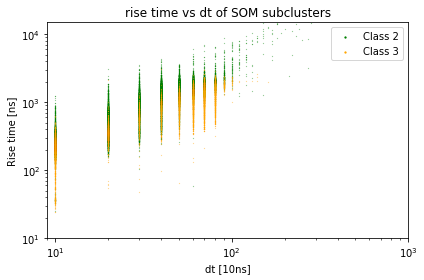

In [259]:
fig = plt.figure(figsize=(6,4))
#plt.scatter(class0_2['area'],class0_2['rise_time'], s= 0.1, marker='.',color='b', label = "Class 1")
plt.scatter(class1_2['dt'],class1_2['rise_time'], s= 0.1, marker='.',color='g', label = "Class 2")
plt.scatter(class3_2['dt'],class3_2['rise_time'], s= 0.1, marker='.',color='orange', label = "Class 3")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(10,15000)
plt.xlim(9,1e3)
plt.xscale('log')
plt.xlabel('dt [10ns]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.title('rise time vs dt of SOM subclusters')
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_3lbl_SOM_class.pdf')
plt.show()

Text(0.5, 1.0, 'Number of events per time sample kr83 calibration run green cluster')

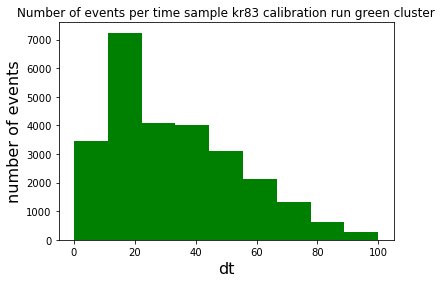

In [297]:
plt.hist(class1_2['dt'], bins= np.linspace(0, 100, 10), color = 'g')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('dt', fontsize = 16)
plt.ylabel('number of events', fontsize = 16)
plt.title('Number of events per time sample kr83 calibration run green cluster')

Text(0.5, 1.0, 'Number of events per time sample kr83 calibration run orange cluster')

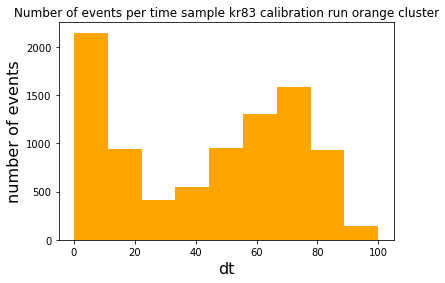

In [298]:
plt.hist(class3_2['dt'], bins= np.linspace(0, 100, 10), color = 'orange')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('dt', fontsize = 16)
plt.ylabel('number of events', fontsize = 16)
plt.title('Number of events per time sample kr83 calibration run orange cluster')

Here we upsamle the data to analyze it without any attributes that were an artifact of dt

In [352]:
green_som_80dt = green_som[green_som['dt'] < 90]
orange_som_80dt = orange_som[orange_som['dt'] < 90]

In [353]:
class3_2_80dt = class3_2[class3_2['dt'] < 90]
class1_2_80dt = class1_2[class1_2['dt'] < 90]

No handles with labels found to put in legend.


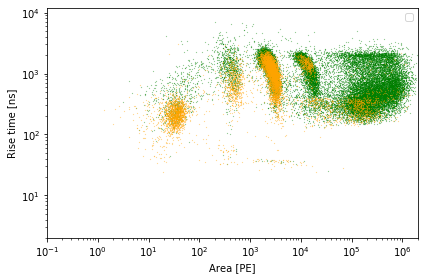

In [354]:
fig = plt.figure(figsize=(6,4))
#plt.scatter(class0_2['area'],class0_2['rise_time'], s= 0.1, marker='.',color='b', label = 'Class 1')
plt.scatter(green_som_80dt['area'],class1_2_80dt['rise_time'], s= 0.1, marker='.',color='g')#, label = 'Class 2 and 3')
plt.scatter(orange_som_80dt['area'],class3_2_80dt['rise_time'], s= 0.1, marker='.',color='orange')
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_2lbl_SOM_class.pdf')
plt.show()

In [357]:
data = green_som_80dt['data'].copy()
dt = green_som_80dt['dt'].copy() // 10 # Integer divide by 10 ns
max_dt = 8 # units of 10 ns
assert dt.max() <= max_dt

# This will be where the padded waveforms go
green_padded_data = np.zeros((data.shape[0],
                              data.shape[1]*max_dt))

for value in np.unique(dt): 
    # Just pick waveforms with dt of some value, where this is the mask
    selection = dt == value

    # Fill required values in the padded data
    green_padded_data[selection, 0:value*200] = np.repeat(data[selection],
                                                          value,
                                                          axis=1,)
green_padded_data

array([[0.47875676, 0.4582178 , 0.36703318, ..., 0.        , 0.        ,
        0.        ],
       [1.22726655, 1.22726655, 1.77848363, ..., 0.        , 0.        ,
        0.        ],
       [1.11599636, 1.11599636, 1.11599636, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61149186, 0.61149186, 0.61149186, ..., 0.        , 0.        ,
        0.        ],
       [0.56563848, 0.68987542, 0.63810998, ..., 0.        , 0.        ,
        0.        ],
       [0.41466835, 0.40531462, 0.44711649, ..., 0.        , 0.        ,
        0.        ]])

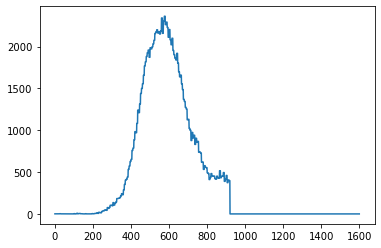

In [358]:
plt.plot(green_padded_data[100,:])

In [359]:
data = orange_som_80dt['data'].copy()
dt = orange_som_80dt['dt'].copy() // 10 # Integer divide by 10 ns
max_dt = 8 # units of 10 ns
assert dt.max() <= max_dt

# This will be where the padded waveforms go
orange_padded_data = np.zeros((data.shape[0],
                              data.shape[1]*max_dt))

for value in np.unique(dt): 
    # Just pick waveforms with dt of some value, where this is the mask
    selection = dt == value

    # Fill required values in the padded data
    orange_padded_data[selection, 0:value*200] = np.repeat(data[selection],
                                                           value,
                                                           axis=1,)
orange_padded_data

array([[0.69944966, 0.7179358 , 0.38421634, ..., 0.        , 0.        ,
        0.        ],
       [0.04093938, 0.0731242 , 0.01335239, ..., 0.        , 0.        ,
        0.        ],
       [1.23471284, 1.23471284, 1.23471284, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22813243, 0.1863583 , 0.18981113, ..., 0.        , 0.        ,
        0.        ],
       [0.35295874, 0.44550043, 0.3507764 , ..., 0.        , 0.        ,
        0.        ],
       [0.28790614, 0.37149033, 0.3031033 , ..., 0.        , 0.        ,
        0.        ]])

Text(0.5, 1.0, 'mean and std S2 green cluster waveform upsampled')

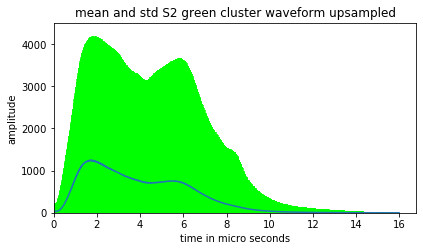

In [364]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(1600)/100, 
             green_padded_data.mean(0), 
             np.std(green_padded_data, axis = 0), 
             ecolor = 'lime')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('time in micro seconds')
plt.ylabel('amplitude')
plt.title('mean and std S2 green cluster waveform upsampled')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

Text(0.5, 1.0, 'mean and std S2 orange cluster waveform upsampled')

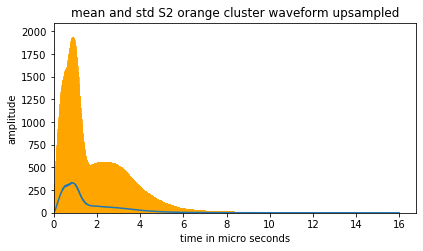

In [365]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(1600)/100, 
             orange_padded_data.mean(0), 
             np.std(orange_padded_data, axis = 0), 
             ecolor = 'orange')
plt.ylim(0)
plt.xlim(0)
plt.xlabel('time in micro seconds')
plt.ylabel('amplitude')
plt.title('mean and std S2 orange cluster waveform upsampled')
#plt.savefig('Qual_imgs/Mean_std_8000PE_dt80_S1_SI.pdf')

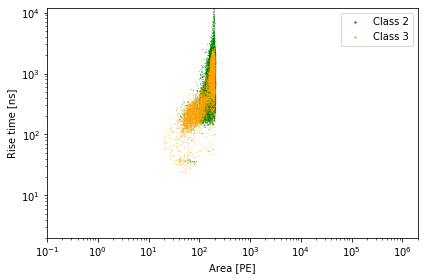

In [257]:
fig = plt.figure(figsize=(6,4))
#plt.scatter(class0_2['area'],class0_2['rise_time'], s= 0.1, marker='.',color='b', label = "Class 1")
plt.scatter(class1_2['length'],class1_2['rise_time'], s= 0.1, marker='.',color='g', label = "Class 2")
plt.scatter(class3_2['length'],class3_2['rise_time'], s= 0.1, marker='.',color='orange', label = "Class 3")
#plt.scatter(class2['area'],class2['rise_time'], s= 0.1, marker='.',color='red')
plt.yscale('log')
plt.ylim(2,12000)
plt.xlim(0.1,2e6)
plt.xscale('log')
plt.xlabel('Area [PE]')#, fontsize = 30)
plt.ylabel('Rise time [ns]')#, fontsize = 30)
plt.legend(markerscale=8)#, fontsize = 24)
plt.tight_layout()
#plt.savefig('Checks/kr83_real_data_3lbl_SOM_class.pdf')
plt.show()

* Normalized the data so every peak has the same maximum, this would help SOMs to do a better classification

In [469]:
S2_normalized = []
for s2 in s2_peaks:
    S2_normalized.append(s2['data']/sum(s2['data']))

In [470]:
S1_normalized = []
for s1 in s1_peaks:
    S1_normalized.append(s1['data']/sum(s1['data']))

In [471]:
S2_normalized = np.array(S2_normalized)
S1_normalized = np.array(S1_normalized)

In [472]:
S_to_classify = np.array(np.concatenate((S2_normalized,S1_normalized)))

In [473]:
np.shape(S_to_classify)

(62357, 200)

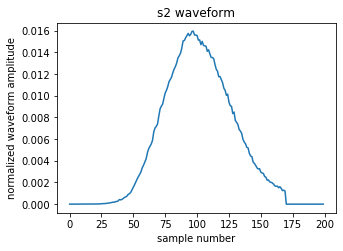

In [401]:
fig = plt.figure(figsize=(5,3.5))

plt.plot(S2_normalized[211272,:])
plt.title('s2 waveform')
plt.xlabel('sample number')
plt.ylabel('normalized waveform amplitude')
plt.savefig('S2_example.pdf')

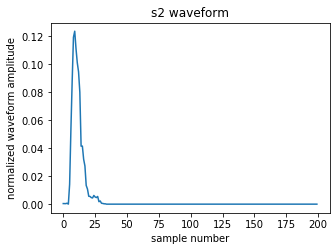

In [402]:
fig = plt.figure(figsize=(5,3.5))

plt.plot(S1_normalized[12255,:])
plt.title('s2 waveform')
plt.xlabel('sample number')
plt.ylabel('normalized waveform amplitude')
plt.savefig('S1_example.pdf')

In [ ]:
plt.plot(S1_normalized[10,:])
plt.title('s1 example real data')
plt.xlabel('sample number')
plt.ylabel('normalized waveform amplitude')

In [64]:
zero_pad = np.zeros(((250*250)-(np.size(S_to_classify[:,1])),200))

In [65]:
real_data_pad = np.concatenate((S_to_classify,zero_pad))

In [67]:
real_data_L1norm_pad = real_data_pad.astype('float32')
real_data_L1norm_vec = np.reshape(real_data_L1norm_pad,(len(real_data_L1norm_pad[1,:])*(len(real_data_L1norm_pad[:,1]))))

In [68]:
import struct

f=open("kr83_real_wf.raw","wb")
export_TL = real_data_L1norm_vec
myfmt='f'*len(export_TL)
#  You can use 'd' for double and < or > to force endinness
bin=struct.pack(myfmt,*export_TL)
f.write(bin)
f.close()

In [175]:
def upsample_data(wfdata, max_dt):
    '''this function takes in waveforms of different dts and upsamples them by repeating
    the elements by the dt value and padding with zeros when necessary
    Max dt is just the largest dt to use'''
    wfdata = wfdata[wfdata['dt']<=max_dt]
    data = wfdata['data'].copy()
    dt = wfdata['dt'].copy() // 10 # Integer divide by 10 ns
    #max_dt = 8 # units of 10 ns
    assert dt.max() <= max_dt

    # This will be where the padded waveforms go
    S2_padded_data = np.zeros((data.shape[0],
                            data.shape[1]*max_dt//10))

    for value in np.unique(dt): 
        # Just pick waveforms with dt of some value, where this is the mask
        selection = dt == value

    # Fill required values in the padded data
        S2_padded_data[selection, 0:value*200] = np.repeat(data[selection],
                                                        value,
                                                        axis=1,)
    return S2_padded_data

In [659]:
def upsample_data_v2(wfdata, max_dt):
    '''this function takes in waveforms of different dts and upsamples them by repeating
    the elements by the dt value and padding with zeros when necessary
    Max dt is just the largest dt to use'''
    wfdata1 = wfdata[wfdata['dt']<=max_dt]
    wfdata2 = wfdata[wfdata['dt']>max_dt]
    data = wfdata['data'].copy()
    
    dt = wfdata1['dt'].copy() // 10 # Integer divide by 10 ns
    dt2 = np.repeat(max_dt // 10, np.size(wfdata2['dt']))
    #max_dt = 8 # units of 10 ns
    #assert dt.max() <= max_dt

    # This will be where the padded waveforms go
    S2_padded_data = np.zeros((wfdata1['data'].shape[0],
                            wfdata1['data'].shape[1]*max_dt//10))
    S2_pd_2 = np.zeros((wfdata2['data'].shape[0],
                            wfdata2['data'].shape[1]*max_dt//10))
    for value in np.unique(dt): 
        # Just pick waveforms with dt of some value, where this is the mask
        selection = dt == value
        
        S2_padded_data[selection, 0:value*200] = np.repeat(data[selection],
                                                        value,
                                                        axis=1,)
        
    for value2 in np.unique(dt2): 
        # Just pick waveforms with dt of some value, where this is the mask
        selection2 = dt2 == value2
    
    # Fill required values in the padded data
        S2_pd_2[selection2, 0:value2*200] = np.repeat(S2_pd_2,
                                                        value,
                                                        axis=1,)
    Padded_data = np.concatenate((S2_padded_data,S2_pd_2))
    Padded_data = np.array(Padded_data)
    return S2_padded_data

In [609]:
krcc_peaks['data'] = np.where(krcc_peaks['data']<0, 0, krcc_peaks['data'])

In [96]:
np.max(krcc_peaks['data'])

106273.27

In [97]:
np.shape(krcc_peaks['data'])

(62357, 200)

In [610]:
krcc_peaks_dt80 = krcc_peaks[krcc_peaks['dt'] <= 80]

In [168]:
max_dt  = 80
wfdata = wfdata[wfdata['dt']<=max_dt]
data = wfdata['data'].copy()
dt = wfdata['dt'].copy() // 10 # Integer divide by 10 ns
#max_dt = 8 # units of 10 ns
assert dt.max() <= max_dt


61824

In [611]:
krcc_peaks_dt80['type']

array([1, 1, 1, ..., 2, 2, 2], dtype=int8)

In [612]:
np.size(krcc_peaks_dt80[krcc_peaks_dt80['type'] == 1])

26214

In [660]:
krcc_peaks_up_s1 = upsample_data_v2(krcc_peaks_dt80[:26214],80)

In [661]:
krcc_peaks_up_s2 = upsample_data_v2(krcc_peaks_dt80[26214:],80)

In [624]:
krcc_peaks_up = np.array(krcc_peaks_up)

In [662]:
np.shape(krcc_peaks_up_s1)

(26214, 1600)

In [663]:
krcc_peaks_up_s1[1,:]

array([0.02855717, 0.08425824, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [618]:
krcc_s2 = krcc_peaks_dt80[krcc_peaks_dt80['type'] == 2]
np.size(krcc_s2['dt'])

35610

In [619]:
np.shape(krcc_s1['data'])

(26214, 200)

In [614]:
krcc_s1 = krcc_peaks_dt80[krcc_peaks_dt80['type'] == 1]
np.size(krcc_s1['dt'])

26214

Text(0, 0.5, 'Amplitude [PE]')

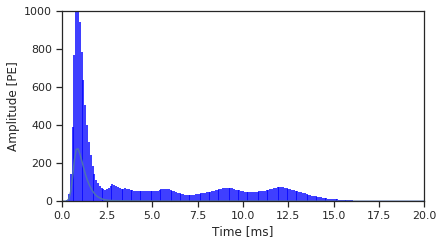

In [1325]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(1600)/10, 
             krcc_peaks_up_s1.mean(0), 
             np.std(krcc_peaks_up_s1, axis = 0), 
             ecolor = 'blue')
#plt.yscale('log')
plt.ylim(0, 1000)
plt.xlim(0,20)
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [PE]')

Text(0, 0.5, 'Amplitude [PE]')

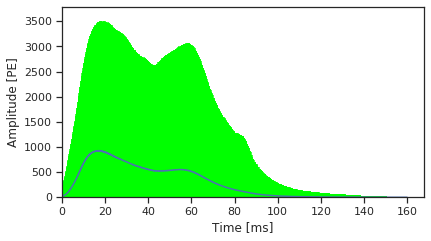

In [1324]:
fig = plt.figure(figsize=(6.5,3.5))
plt.errorbar(np.arange(1600)/10, 
             krcc_peaks_up_s2.mean(0), 
             np.std(krcc_peaks_up_s2, axis = 0), 
             ecolor = 'lime')
#plt.yscale('log')
plt.ylim(0)
plt.xlim(0)#,100)
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [PE]')

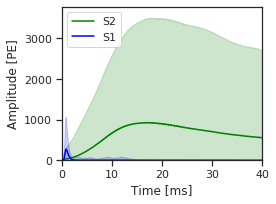

In [1331]:
fig = plt.figure(figsize=(4,3))

plt.plot(np.arange(1600)/10, 
         krcc_peaks_up_s2.mean(0), color = "green",
         ms = 0.5, label = "S2")
plt.plot(np.arange(1600)/10, 
         krcc_peaks_up_s1.mean(0), color = 'blue',
         ms = 0.5, label = "S1")
plt.fill_between(np.arange(1600)/10, 
                krcc_peaks_up_s2.mean(0) - np.std(krcc_peaks_up_s2, axis = 0),
                krcc_peaks_up_s2.mean(0) + np.std(krcc_peaks_up_s2, axis = 0),
                alpha = 0.2, color = 'green')
plt.fill_between(np.arange(1600)/10, 
                krcc_peaks_up_s1.mean(0) - np.std(krcc_peaks_up_s1,axis = 0),
                krcc_peaks_up_s1.mean(0) + np.std(krcc_peaks_up_s1, axis = 0),
                alpha = 0.2, color = 'blue')
#plt.yscale('log')
#plt.xscale('log')
plt.ylim(0)
plt.xlim(0,40)
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [PE]')
plt.legend(loc = "upper left")
plt.tight_layout()
plt.savefig('./Qual_img_pc/MeanSTDs1s2v2.pdf')

In [188]:
def generate_incl_file(filename, xcube, ycube, class_nums):
    '''generates a file that tells NS what the label of each data point is. this needs:
    filename: such as 'data.incl'
    xcube: horizontal dimension of the data cube
    ycube: vertical dimension of the data cube
    class_nums: vector of 3 dimensions detailing where the labels should swtich, the values of each vector should be its own puls the previous'''
    f = open(filename, "w+")
    count = 1
    for i in np.arange(ycube):
        for j in np.arange(xcube):
            if count <= class_nums[0]:
                f.write('include area ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' C' + ' \n')
            if count > class_nums[0] and count <= class_nums[1]:
                f.write('include area ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' G' + '\n')
            if count > class_nums[1]:
                f.write('include area ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' H' + '\n')
            count = count + 1
    f.close()

Exporting of data + generation of include fine needed for NeuroScope

In [193]:
generate_incl_file('kr83_presel_up.incl', 224, 276, [26214,26214+35610, 99999999])

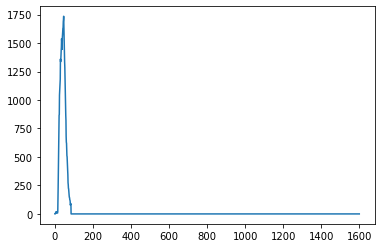

In [192]:
plt.plot(krcc_peaks_up[26215,:])

In [194]:
def L1_norm_c(data):
    #first 0 out all negative values
    data = np.where(data<0, 0, data)
    #now L1 normalize
    peaks_L1 = np.zeros((np.shape(data)))
    for aa in np.arange(len(data[:,1])):
        peaks_L1[aa,:] = data[aa,:]/np.sum(data[aa,:])     
    #sanity check
    if np.min(peaks_L1) != 0:
        print("error has occured, data minimum is NOT 0")
        
    return peaks_L1

In [195]:
krcc_peaks_up_L1 = L1_norm_c(krcc_peaks_up)

In [198]:
def export_data(data, export_name):
    data_vec = np.reshape(data, (len(data[1,:])*len(data[:,1])))
    
    import struct

    f=open(export_name,"wb")
    export_TL = data_vec
    export_TL.dtype
    myfmt='f'*len(export_TL)
    #  You can use 'd' for double and < or > to force endinness
    bin=struct.pack(myfmt,*export_TL)
    f.write(bin)
    f.close()
    #export name must be a string with the extnesion.raw

In [199]:
export_data(krcc_peaks_up_L1, 'kr83_presel_up_L1.raw')

In [130]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

In [ ]:
def generate_minmax_table(filename, maximum, minimum, input_layer, output):
    f = open(filename, "w+")
    count = 1
    for i in np.arange(input_layer + output):
        f.write(str(maximum) + ' ')
            if count <= class_nums[0]:
                f.write('include area ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' C' + ' \n')
            if count > class_nums[0] and count <= class_nums[1]:
                f.write('include area ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' G' + '\n')
            if count > class_nums[1]:
                f.write('include area ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' ' 
                        +str(j+1) + ' ' 
                        +str(i+1) + ' H' + '\n')
            count = count + 1
    f.close()

In [107]:
wfdata = krcc_peaks[krcc_peaks['dt']<=80]

In [108]:
wfdata2 = krcc_peaks[krcc_peaks['dt']>80]

In [154]:
S2_final = np.where(np.array(S2_normalized)<0, 0, np.array(S2_normalized))

In [155]:
S1_final = np.where(np.array(S1_normalized)<0, 0, np.array(S1_normalized))

* Replace negative values with zeros, to help SOMs 

In [147]:
S_final = np.where(S_to_classify<0, 0, S_to_classify)

In [205]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

In [206]:
factors(929461) #this was used to help make data cube

{1,
 13,
 19,
 53,
 71,
 247,
 689,
 923,
 1007,
 1349,
 3763,
 13091,
 17537,
 48919,
 71497,
 929461}

In [406]:
s2_tr = np.array(s2_tr)
s1_tr = np.array(s1_tr)
s_tr = np.array(s_tr)

s2_trt = np.where(s2_tr<0, 0, s2_tr)
s1_trt = np.where(s1_tr<0, 0, s1_tr)
s_trt = np.where(s_tr<0, 0, s_tr)

In [408]:
S2_normalized = []
for jj in np.arange(np.size(s2)):
    S2_normalized.append(s2_trt[jj,:]/np.sum(s2_trt[jj,:]))

In [409]:
S1_normalized = []
for jj in np.arange(np.size(s1)):
    S1_normalized.append(s1_trt[jj,:]/sum(s1_trt[jj,:]))

<ipython-input-409-575d3f1a68d0>:3: RuntimeWarning: invalid value encountered in true_divide
  S1_normalized.append(s1_trt[jj,:]/sum(s1_trt[jj,:]))


In [410]:
S_normalized = []
for jj in np.arange(np.size(s)):
    S_normalized.append(s_trt[jj,:]/sum(s_trt[jj,:]))

In [412]:
S1_normalized = np.array(S1_normalized)
S2_normalized = np.array(S2_normalized)
S_normalized = np.array(S_normalized)

In [413]:
zero_v = np.zeros(200)
S1_normalized[30173,:] = zero_v

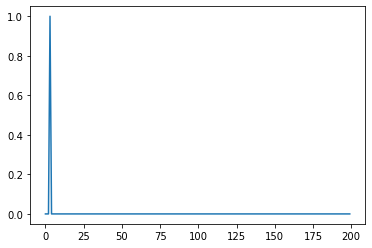

In [347]:
plt.plot(S1_normalized[28855,:])

In [219]:
S2_normalized = np.array(S2_normalized)
S1_normalized = np.array(S1_normalized)
S_normalized = np.array(S_normalized)

In [348]:
S_to_classify = np.array(np.concatenate((S2_normalized,S1_normalized)))
S_to_classify = np.array(np.concatenate((S_to_classify,S_normalized)))

In [349]:
S_final = np.where(S_to_classify<0, 0, S_to_classify)

In [350]:
real_data_L1norm = S_final.astype('float32')
real_data_L1norm_vec = np.reshape(real_data_L1norm,(len(real_data_L1norm[1,:])*(len(real_data_L1norm[:,1]))))

In [351]:
f=open("kr83_real_wf_unfiltered_v2.raw","wb")
export_TL = real_data_L1norm_vec
myfmt='f'*len(export_TL)
#  You can use 'd' for double and < or > to force endinness
bin=struct.pack(myfmt,*export_TL)
f.write(bin)
f.close()